In [ ]:
#Introduction to Forecasting Models Part One

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df =pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [3]:
df.index.freq ='MS'

In [4]:
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [5]:
df.tail()

Thousands of Passengers
Month                              
1960-08-01                      606
1960-09-01                      508
1960-10-01                      461
1960-11-01                      390
1960-12-01                      432

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
train_data =df.iloc[:109] # all row to 108
test_data = df.iloc[108:] # 108 to 144 

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [9]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                   trend='mul',
                                   seasonal='mul',
                                   seasonal_periods=12).fit()

In [10]:
test_predictions =fitted_model.forecast(36)

In [11]:
test_predictions

1958-02-01    331.649486
1958-03-01    388.989620
1958-04-01    380.125229
1958-05-01    388.290918
1958-06-01    453.379218
1958-07-01    502.248555
1958-08-01    490.986946
1958-09-01    424.051080
1958-10-01    365.391637
1958-11-01    318.392247
1958-12-01    360.320760
1959-01-01    369.905595
1959-02-01    359.903247
1959-03-01    422.128280
1959-04-01    412.508717
1959-05-01    421.370055
1959-06-01    492.003333
1959-07-01    545.035929
1959-08-01    532.814925
1959-09-01    460.176683
1959-10-01    396.519947
1959-11-01    345.516602
1959-12-01    391.017074
1960-01-01    401.418457
1960-02-01    390.563992
1960-03-01    458.090078
1960-04-01    447.651008
1960-05-01    457.267258
1960-06-01    533.917900
1960-07-01    591.468430
1960-08-01    578.206298
1960-09-01    499.379886
1960-10-01    430.300128
1960-11-01    374.951726
1960-12-01    424.328457
1961-01-01    435.615950
Freq: MS, dtype: float64

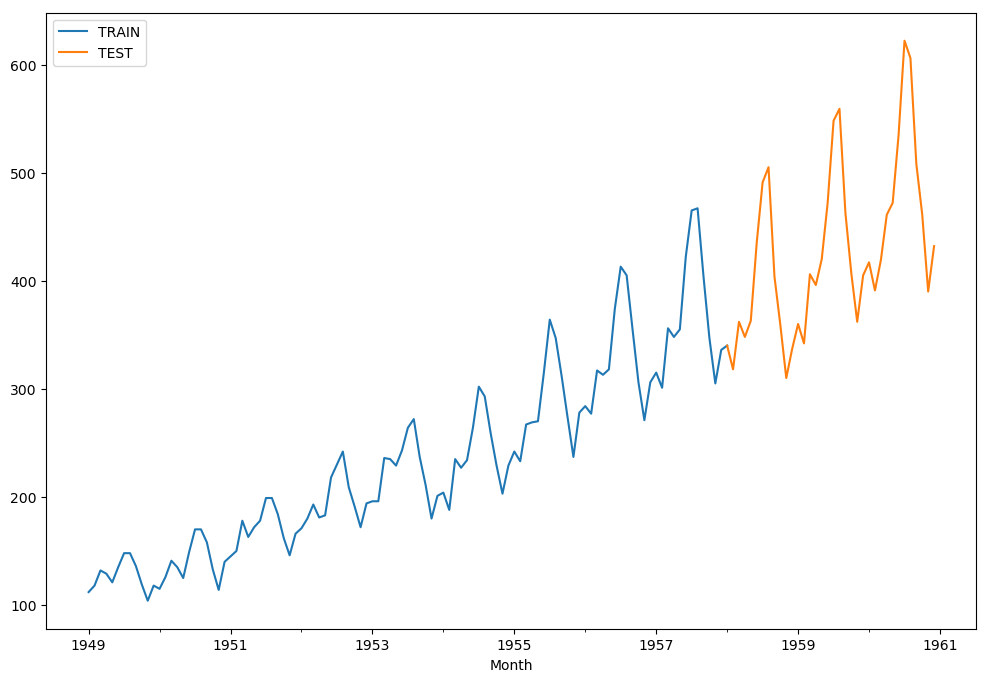

In [12]:
train_data['Thousands of Passengers'].plot(legend= True,label = 'TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST')

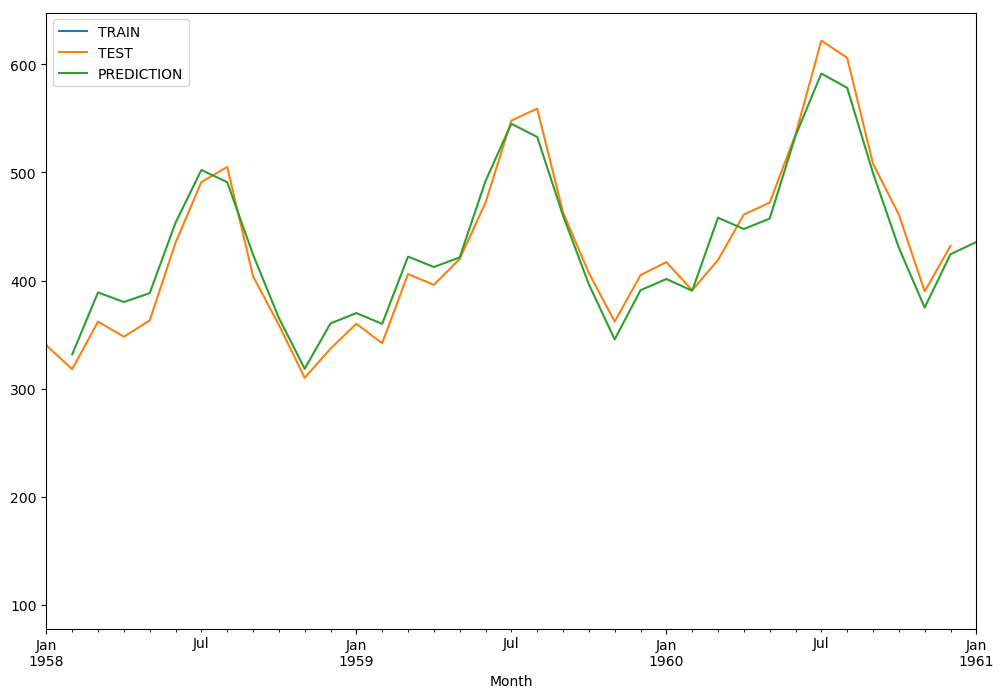

In [13]:
train_data['Thousands of Passengers'].plot(legend= True,label = 'TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01'])

In [14]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

C:\Users\SHRI\.conda\envs\tsa_course\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [15]:
test_data.describe()

Thousands of Passengers
count                36.000000
mean                428.500000
std                  79.329152
min                 310.000000
25%                 362.000000
50%                 412.000000
75%                 472.000000
max                 622.000000

In [16]:
mean_absolute_error(test_data,test_predictions)

46.30290455223698

In [17]:
mean_squared_error(test_data,test_predictions)

3075.328467017842

In [18]:
np.sqrt(mean_squared_error(test_data,test_predictions))

55.4556441403203

In [19]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [20]:
forecast_predictions = final_model.forecast(36)

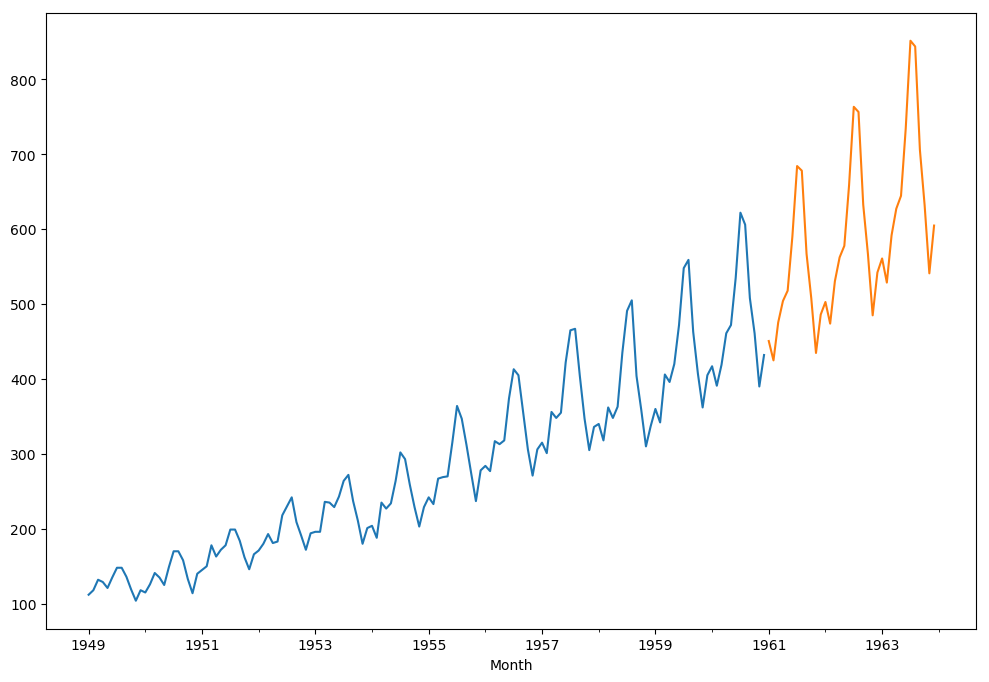

In [21]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

In [22]:
df2 =pd.read_csv('samples.csv',index_col=0,parse_dates=True)

In [23]:
df2.head()

a   b  c   d
1950-01-01  36  27  0  67
1950-02-01  58  22  3  31
1950-03-01  61  17  5  67
1950-04-01  37  15  8  47
1950-05-01  66  13  8  62

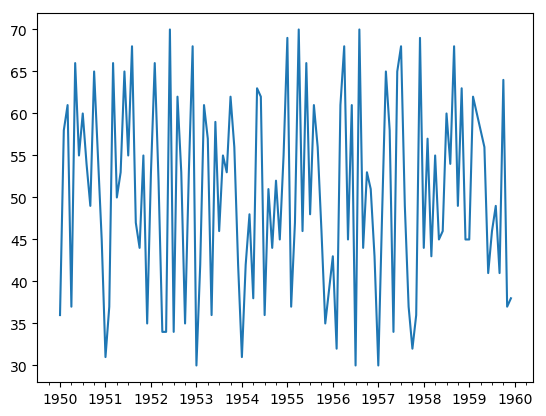

In [24]:
df2['a'].plot()
#not any seasonality components in below plot
#this is stationary data

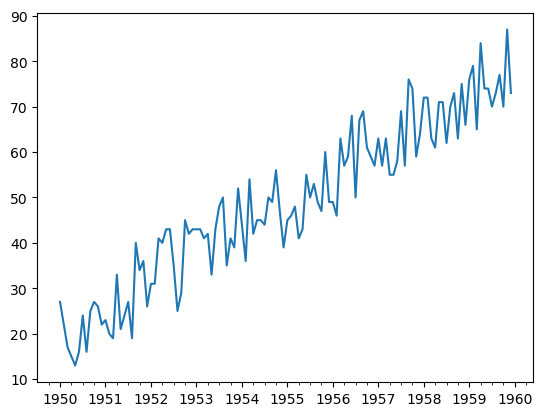

In [25]:
df2['b'].plot()
#this is non stationary data

In [26]:
from statsmodels.tsa.statespace.tools import diff

In [27]:
#df2['b'] - df2['b'].shift(1)

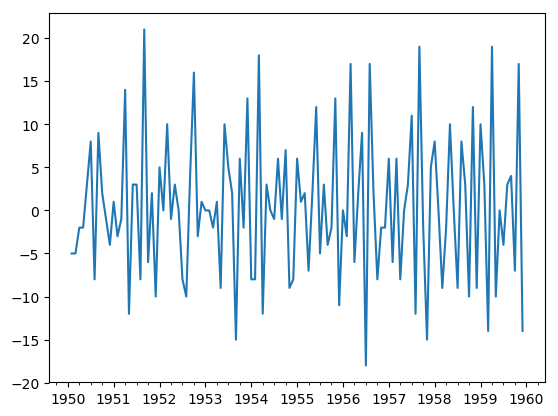

In [28]:
diff(df2['b'],k_diff=1).plot()
# the data is stationary

In [29]:
#### ACF AND PACF

In [30]:
#### ACF AND PACF code ALONG

In [31]:
import pandas as pd
import numpy as np
%matplotlib inline


In [32]:
import statsmodels.api as sm

In [33]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [34]:
# Non stationary
df1=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

In [35]:
#Stationary
df2 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq= 'D'

In [36]:
df1.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [37]:
df2.head()

Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
df =pd.DataFrame({'a':[13,5,11,12,9]})

In [40]:
df

a
0  13
1   5
2  11
3  12
4   9

In [41]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [42]:
 pacf_yw(df['a'],nlags=4,method='mle')

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [43]:
#another way
pacf_yw(df['a'],nlags=4,method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [44]:
pacf_ols(df['a'],nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [45]:
from pandas.plotting import lag_plot

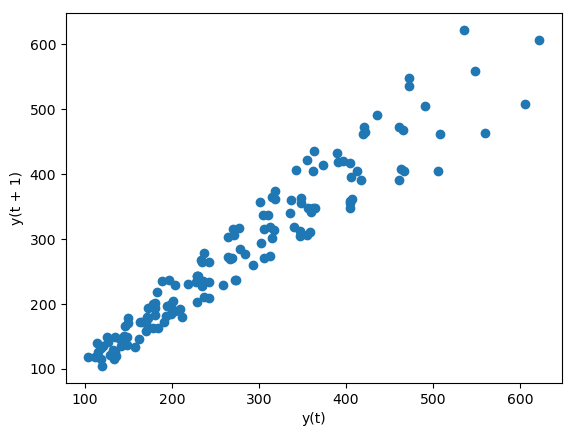

In [46]:
lag_plot(df1['Thousands of Passengers'])

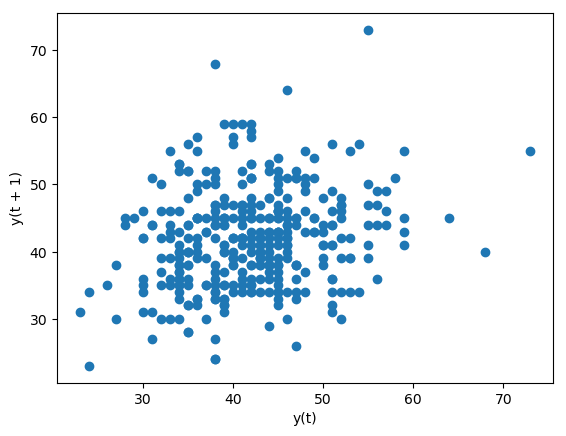

In [47]:
lag_plot(df2['Births'])

In [48]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

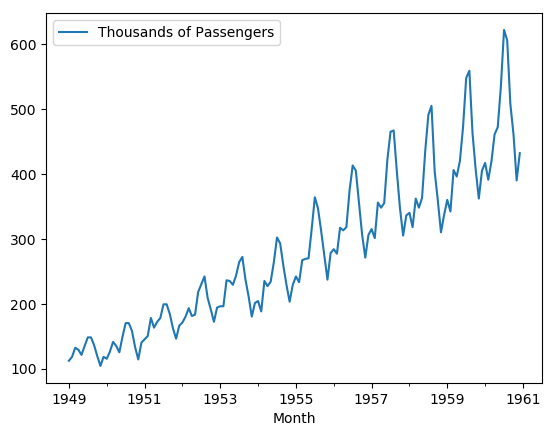

In [49]:
df1.plot()

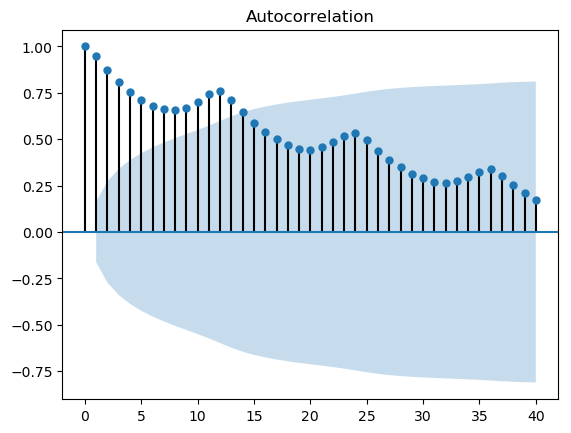

In [50]:
plot_acf(df1,lags=40);

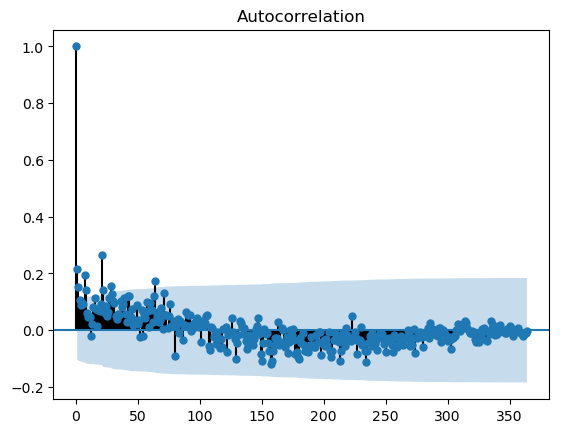

In [51]:
#stationary plot
plot_acf(df2);

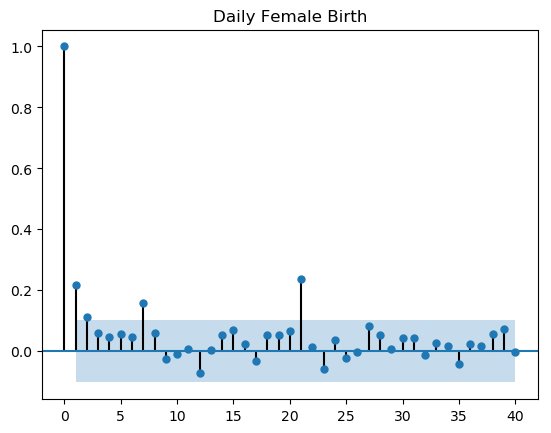

In [52]:
plot_pacf(df2,lags=40, title='Daily Female Birth');

In [53]:
###Autogression -AR with Statsmodels

In [54]:
import pandas as pd
import numpy as np
%matplotlib inline

In [55]:
from statsmodels.tsa.ar_model import AR,ARResults


In [56]:
df = pd.read_csv('uspopulation.csv', index_col='DATE',parse_dates=True)

In [57]:
df.index.freq = 'MS'

In [58]:
df.head()

PopEst
DATE              
2011-01-01  311037
2011-02-01  311189
2011-03-01  311351
2011-04-01  311522
2011-05-01  311699

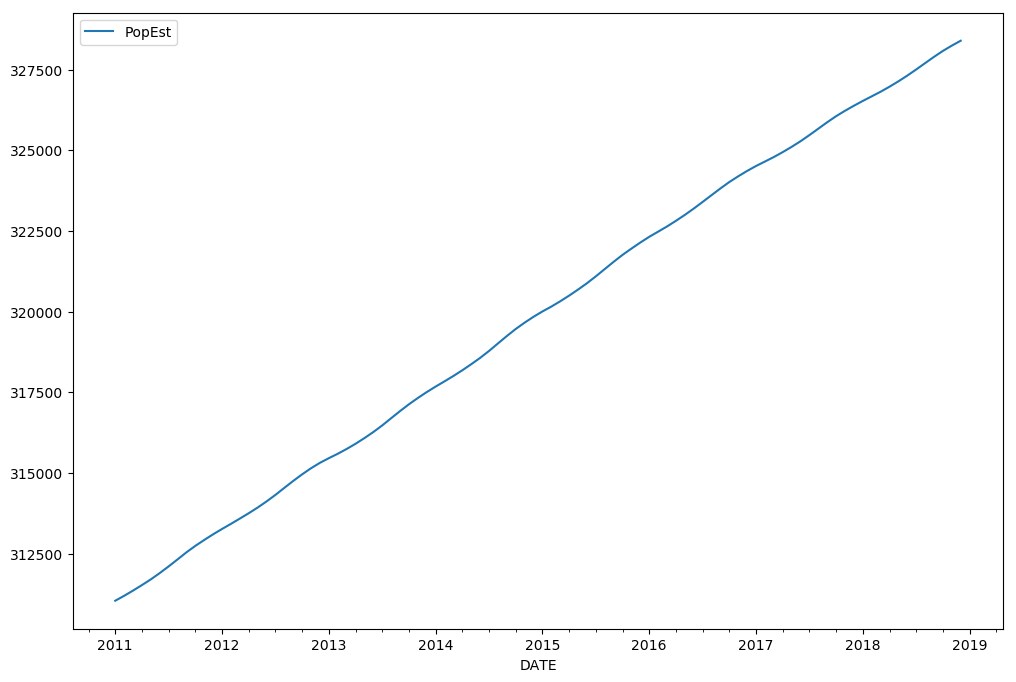

In [59]:
df.plot(figsize=(12,8))

In [60]:
#next step split the data into trining set and test set
len(df)


96

In [61]:
96-12

84

In [62]:
train =df.iloc[:84]

In [63]:
test =df.iloc[84:]

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
model=AR(train['PopEst'])

In [70]:
AR1fit =model.fit(maxlag=1)

In [72]:
AR1fit.k_ar

1

In [73]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [74]:
start =len(train)

In [77]:
end =len(train) + len(test) -1

In [78]:
start

84

In [79]:
end

95

In [80]:
AR1fit.predict(start=start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [81]:
test

PopEst
DATE              
2018-01-01  326527
2018-02-01  326669
2018-03-01  326812
2018-04-01  326968
2018-05-01  327134
2018-06-01  327312
2018-07-01  327502
2018-08-01  327698
2018-09-01  327893
2018-10-01  328077
2018-11-01  328241
2018-12-01  328393

In [82]:
predictions1 =AR1fit.predict(start=start,end=end)

In [83]:
predictions1 = predictions1.rename('AR(1) Predictions')

In [84]:
 predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

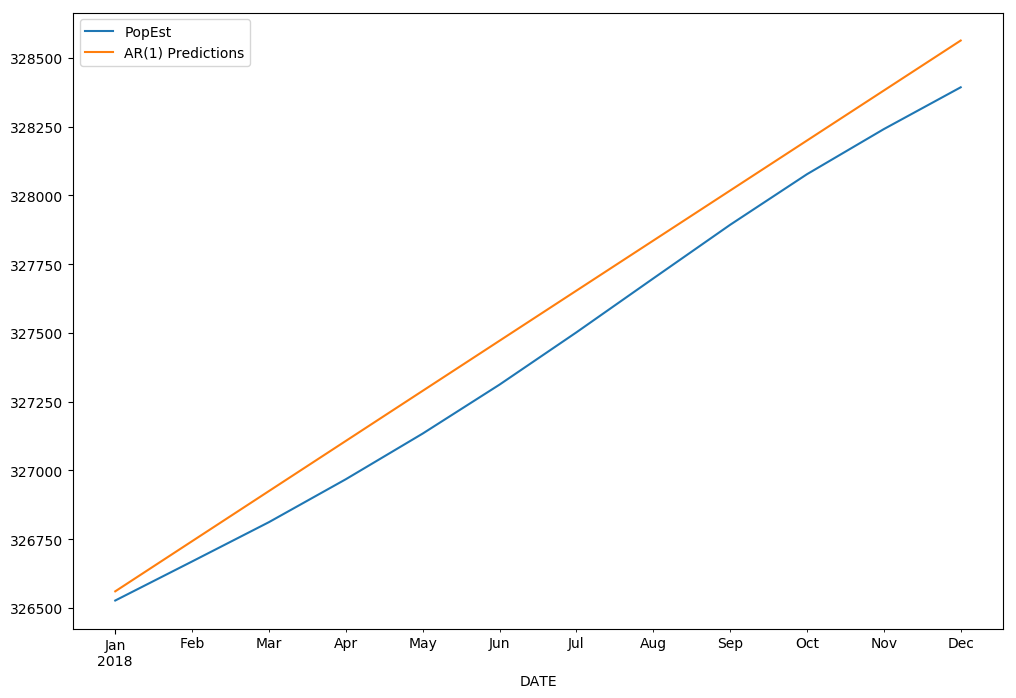

In [85]:
test.plot(figsize=(12,8));legend=True
predictions1.plot(legend=True)

In [87]:
AR2fit =model.fit(maxlag=2)

In [88]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [89]:
predictions2 =AR2fit.predict(start,end)

In [90]:
predictions2 = predictions2.rename('AR (2) predictions')

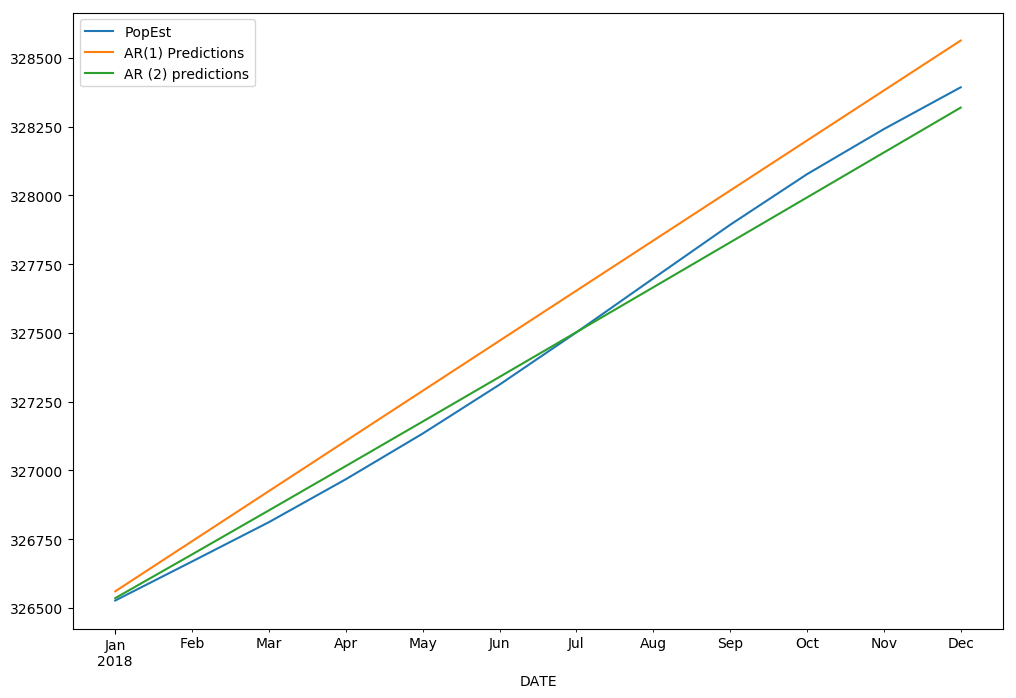

In [91]:
test.plot(figsize=(12,8));legend=True
predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [92]:
ARfit =model.fit(ic='t-stat')
#ARfit = model.fit(ic_method='t-stat')



In [93]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [95]:
prediction8 =ARfit.predict(start,end)
prediction8 =prediction8.rename('AR(8) Predictions')

In [96]:
from sklearn.metrics import mean_squared_error

In [97]:
labels =['AR1','AR2','AR8']

In [99]:
preds = [predictions1,predictions2,prediction8]

In [100]:
for i in range(3):
    error =mean_squared_error(test['PopEst'],preds[i])
    print(f'{labels[i]} MSE was : {error}')

AR1 MSE was : 17449.714238096432
AR2 MSE was : 2713.258754916151
AR8 MSE was : 186.97275174273457


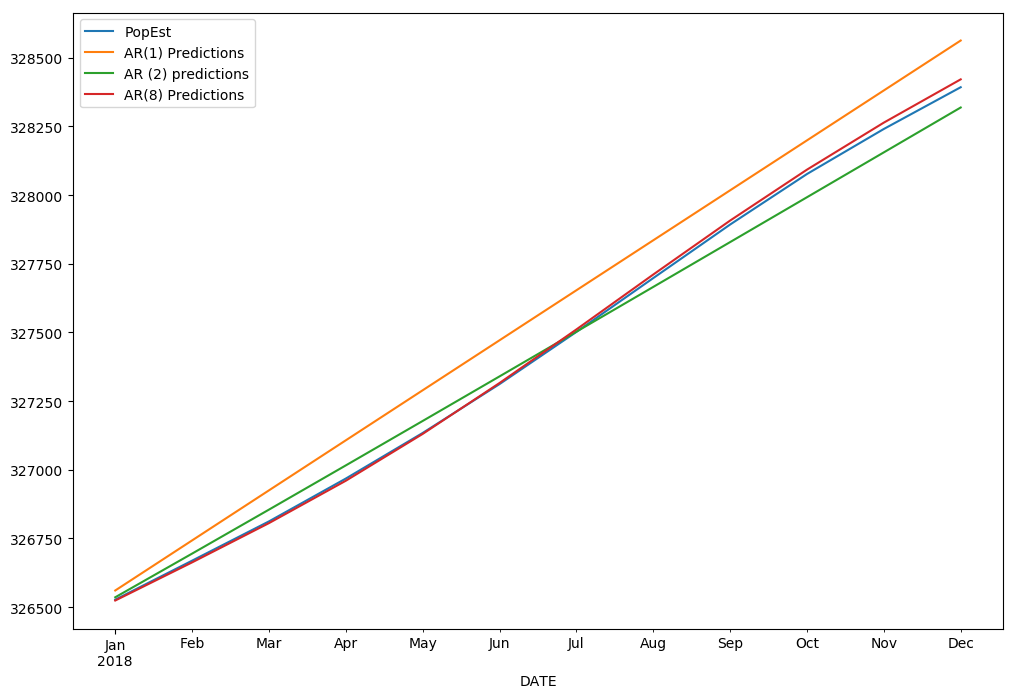

In [102]:
test.plot(figsize=(12,8));legend=True
predictions1.plot(legend=True)
predictions2.plot(legend=True)
prediction8.plot(legend=True)

In [115]:
#FORECASTING _ FUTURE

model =AR(df['PopEst'])
ARfit =model.fit(maxlag=8)

Forecasted_value =ARfit.predict(start=len(df),end=len(df)+12).rename('Forecast')
#in above case we predict 12 month remember that test set value = forecatsd_value

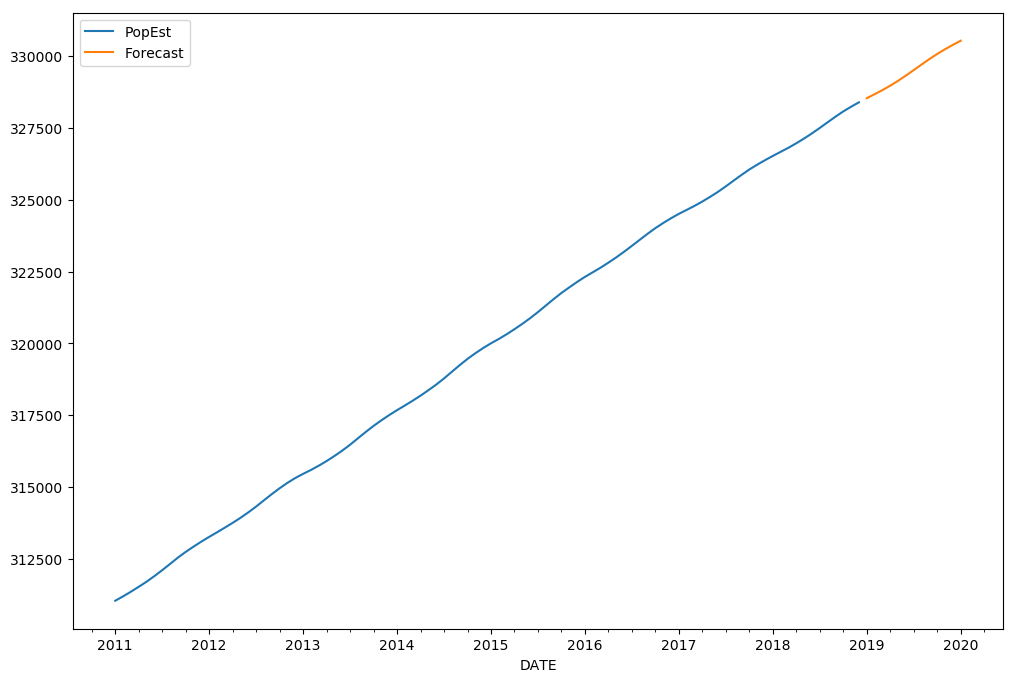

In [119]:
df['PopEst'].plot(figsize=(12,8),legend=True)
Forecasted_value.plot(legend=True)

In [ ]:
#60 Descriptive statistics  and Tests - Parts Two

In [125]:
import pandas as pd
import numpy as np
%matplotlib inline

#ignore harmless warnings 
import warnings
warnings.filterwarnings("ignore")

#load a Seasonal dataset
df1=pd.read_csv("airline_passengers.csv",index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

#load a non-seasonal dataset
df2=pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

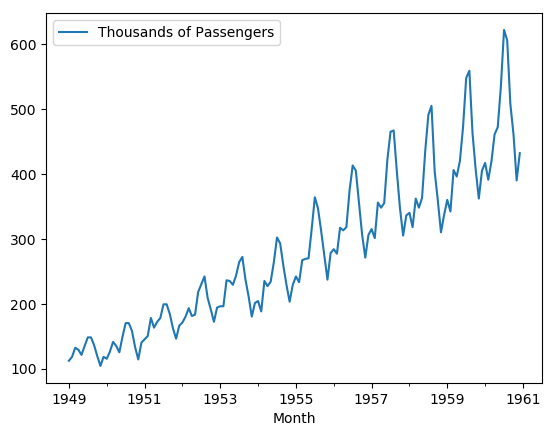

In [127]:
df1.plot()

In [128]:
from statsmodels.tsa.stattools import adfuller

In [129]:
adfuller(df1['Thousands of Passengers'])

(0.815368879206053,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [130]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information 

In [131]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout =pd.Series(dftest[0:4],index=['ADF Test Statistics','p-value','# Lags used','# Observations'])

In [132]:
dfout

ADF Test Statistics      0.815369
p-value                  0.991880
# Lags used             13.000000
# Observations         130.000000
dtype: float64

In [133]:
for key, val in dftest[4].items():
    dfout[f'critical value ({key})'] =val

In [134]:
dfout

ADF Test Statistics       0.815369
p-value                   0.991880
# Lags used              13.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

In [136]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [137]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [138]:
df2

Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
1959-01-06      29
1959-01-07      45
1959-01-08      43
1959-01-09      38
1959-01-10      27
1959-01-11      38
1959-01-12      33
1959-01-13      55
1959-01-14      47
1959-01-15      45
1959-01-16      37
1959-01-17      50
1959-01-18      43
1959-01-19      41
1959-01-20      52
1959-01-21      34
1959-01-22      53
1959-01-23      39
1959-01-24      32
1959-01-25      37
1959-01-26      43
1959-01-27      39
1959-01-28      35
1959-01-29      44
1959-01-30      38
...            ...
1959-12-02      32
1959-12-03      46
1959-12-04      41
1959-12-05      34
1959-12-06      33
1959-12-07      36
1959-12-08      49
1959-12-09      43
1959-12-10      43
1959-12-11      34
1959-12-12      39
1959-12-13      35
1959-12-14      52
1959-12-15      47
1959-12-16      52
1959-12-17      39
1959-12-18      40
1959-12-19      42
1959-12-20      42
1959-12-21      53
1959-12-22      39
1959-12-23      40
1959-12-24      38
1959-12-25      44
1959-12-26      34
1959-12-27      37
1959-12-28      52
1959-12-29      48
1959-12-30      55
1959-12-31      50

[365 rows x 1 columns]

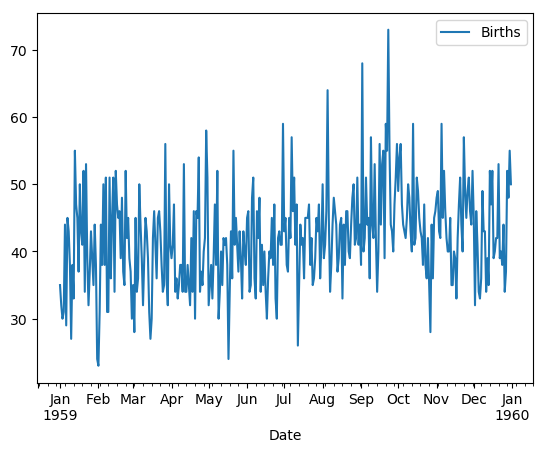

In [139]:
df2.plot()

In [140]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [141]:
df3=pd.read_csv('samples.csv',index_col=0,parse_dates=True)
df3.index.freq = 'MS'

In [146]:
df3

a   b      c   d
1950-01-01  36  27      0  67
1950-02-01  58  22      3  31
1950-03-01  61  17      5  67
1950-04-01  37  15      8  47
1950-05-01  66  13      8  62
1950-06-01  55  16     19  60
1950-07-01  60  24     24  53
1950-08-01  54  16     33  71
1950-09-01  49  25     44  63
1950-10-01  65  27     60  46
1950-11-01  55  26     69  25
1950-12-01  45  22     85  42
1951-01-01  31  23    104  62
1951-02-01  37  20    116  47
1951-03-01  66  19    139  49
1951-04-01  50  33    162  72
1951-05-01  53  21    183  48
1951-06-01  65  24    202  66
1951-07-01  55  27    227  44
1951-08-01  68  19    252  48
1951-09-01  47  40    281  49
1951-10-01  44  34    314  27
1951-11-01  55  36    345  53
1951-12-01  35  26    377  74
1952-01-01  53  31    405  47
1952-02-01  66  31    444  29
1952-03-01  52  41    478  29
1952-04-01  34  40    515  63
1952-05-01  34  43    550  39
1952-06-01  70  43    597  60
...         ..  ..    ...  ..
1957-07-01  68  69   5720  37
1957-08-01  49  57   5848  27
1957-09-01  37  76   5978  35
1957-10-01  32  74   6108  75
1957-11-01  36  59   6235  41
1957-12-01  69  64   6374  62
1958-01-01  44  72   6505  49
1958-02-01  57  72   6644  57
1958-03-01  43  63   6781  53
1958-04-01  55  61   6920  54
1958-05-01  45  71   7060  53
1958-06-01  46  71   7203  47
1958-07-01  60  62   7347  62
1958-08-01  54  70   7494  54
1958-09-01  68  73   7636  60
1958-10-01  49  63   7783  45
1958-11-01  63  75   7935  39
1958-12-01  45  66   8081  63
1959-01-01  45  76   8239  60
1959-02-01  62  79   8389  52
1959-03-01  60  65   8545  64
1959-04-01  58  84   8699  44
1959-05-01  56  74   8856  53
1959-06-01  41  74   9014  55
1959-07-01  46  70   9178  43
1959-08-01  49  73   9338  58
1959-09-01  41  77   9502  38
1959-10-01  64  70   9667  42
1959-11-01  37  87   9833  62
1959-12-01  38  73  10000  50

[120 rows x 4 columns]

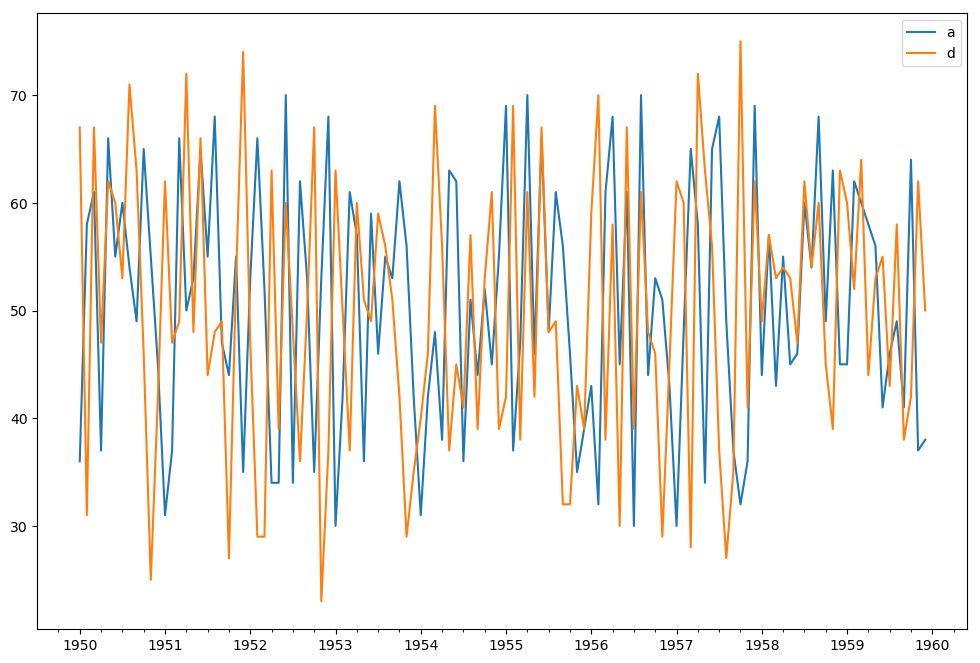

In [142]:
df3[['a','d']].plot(figsize=(12,8))

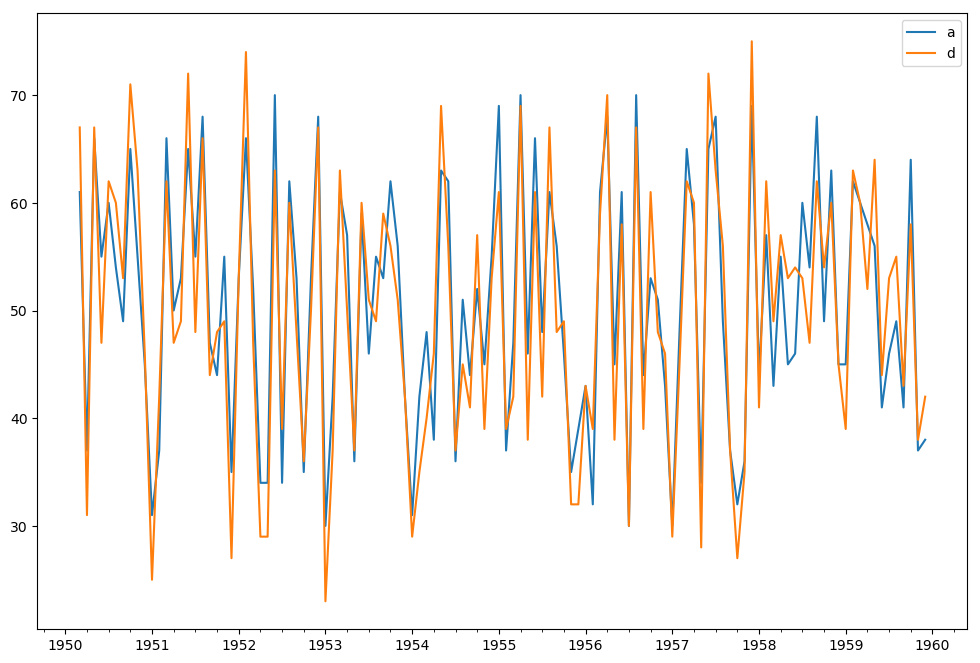

In [143]:
df3['a'].iloc[2:].plot(figsize=(12,8),legend=True)
df3['d'].shift(2).plot(legend=True)

In [144]:
from statsmodels.tsa.stattools import grangercausalitytests

In [147]:
grangercausalitytests(df3[['a','d']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [148]:
grangercausalitytests(df3[['b','d']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


In [ ]:
#61  Descriptive statistics  and Tests - Parts Three

In [150]:
import numpy as np
import pandas as pd
np.random.seed(42)
df =pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])

In [151]:
df.head()

test  predictions
0    26           23
1    27           24
2    26           29
3    22           26
4    27           24

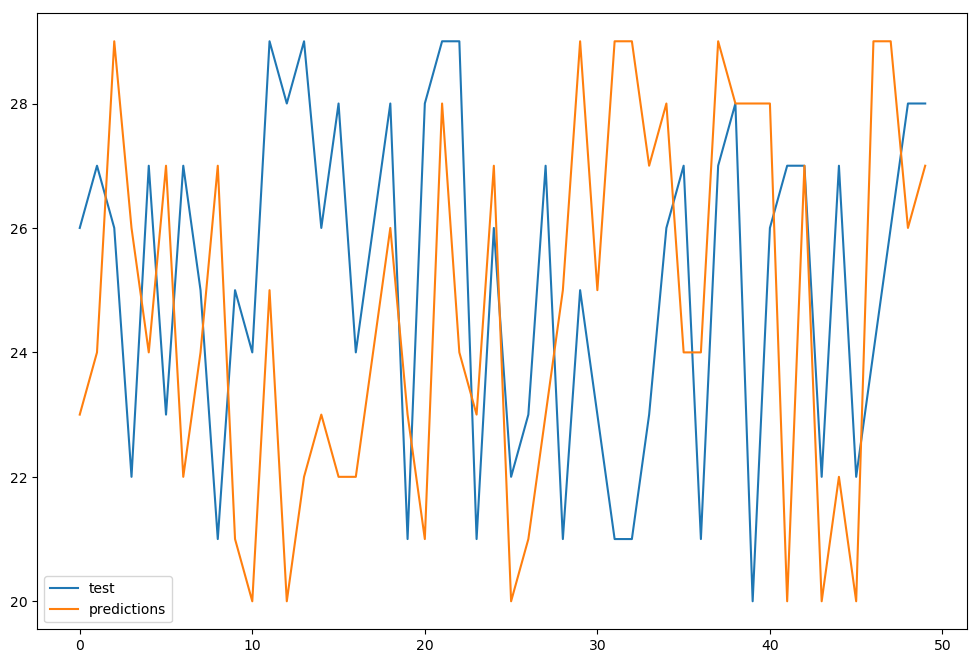

In [152]:
df.plot(figsize=(12,8))

In [153]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs

In [154]:
mse(df['test'],df['predictions'])

17.02

In [155]:
meanabs(df['test'],df['predictions'])

3.54

In [156]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [157]:
df.index.freq = 'MS'

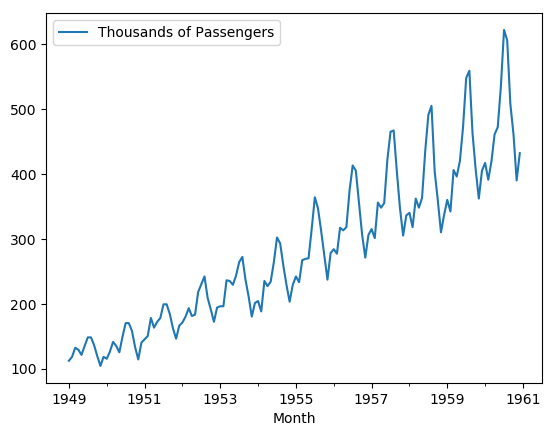

In [158]:
df.plot()

In [159]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

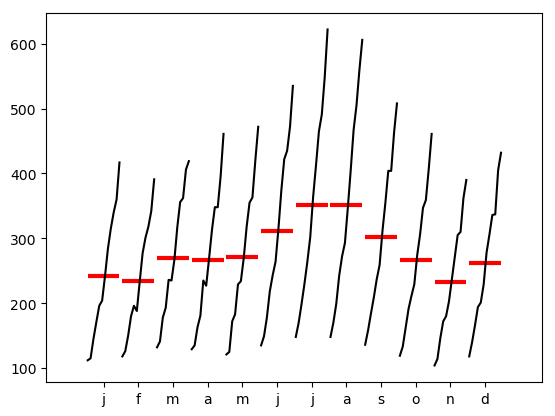

In [160]:
month_plot(df['Thousands of Passengers']);


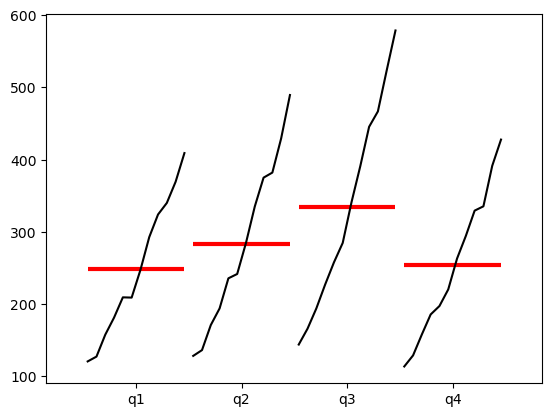

In [161]:
dfq=df['Thousands of Passengers'].resample(rule='Q').mean()
quarter_plot(dfq);


In [ ]:
#62choosing ARIMA Orders - Part One

In [ ]:
#63choosing ARIMA Orders - Part Two

In [175]:
import pandas as pd
import numpy as np
%matplotlib inline

#ignore harmless warnings 
import warnings
warnings.filterwarnings("ignore")

#Load a no-stationary dataset
df1=pd.read_csv("airline_passengers.csv",index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

#load a stationary dataset
df2=pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [176]:
#pip install pmdarima

In [177]:
from pmdarima import auto_arima

In [178]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=10, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ch', stepwise=True, n_jobs=1, start_params=None, trend=None, method=None, transparams=True, solver='lbfgs', maxiter=50, disp=0, callback=None, offset_test_args=None, seasonal_test_args=None, suppress_warnings=False, error_action='warn', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept=True, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The ``auto_arima`` function seeks to identify the most optimal
    parameters for an ``ARIMA`` model, and returns a fitted ARIMA model. This
    function is based on the commonly-used R functio

In [179]:
stepwise_fit = auto_arima(df2['Births'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,trace=True)

Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.006 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.029 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.118 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.233 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.514, BIC=2480.000, Fit time=0.739 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2461.901, BIC=2485.284, Fit time=0.916 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.337 seconds
Total fit time: 2.384 seconds


In [180]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Wed, 06 Dec 2023   AIC                           2460.154
Time:                        20:49:46   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [181]:
stepwise_fit = auto_arima(df['Thousands of Passengers'],start_p=0,start_q=0,max_p=4,max_q=4,
                         seasonal=True,trace=True,m=12)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1415.278, BIC=1421.203, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1299.259, BIC=1311.110, Fit time=0.443 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1398.827, BIC=1407.716, Fit time=0.195 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1301.228, BIC=1316.042, Fit time=0.685 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=1304.383, BIC=1313.271, Fit

In [173]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(0, 0, 1, 12)   Log Likelihood                -626.801
Date:                            Wed, 06 Dec 2023   AIC                           1267.601
Time:                                    20:05:38   BIC                           1288.341
Sample:                                         0   HQIC                          1276.029
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7024      0.168      4.169      0.000       0.372       1.033
ar.L1          1.4368      0.109     13.169      0.000       1.223       1.651
ar.L2         -0.7066      0.080     -8.815      0.000      -0.864      -0.549
ma.L1         -1.4832      0.174     -8.524      0.000      -1.824      -1.142
ma.L2          0.5033      0.175      2.877      0.004       0.160       0.846
ma.S.L12       0.7444      0.077      9.730      0.000       0.594       0.894
sigma2       345.6773     37.222      9.287      0.000     272.723     418.631
===================================================================================
Ljung-Box (Q):                      164.01   Jarque-Bera (JB):                10.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.46   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [174]:
# ARMA and ARIMA -AutoRegressive Integrated Moving Average - Part One

In [182]:
import pandas as pd
import numpy as np
%matplotlib inline

In [183]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

In [184]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [185]:
# Load datasets
df1 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]  # we only want the first four months

df2 = pd.read_csv('TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'


In [ ]:
#Automate the augmented Dickey-Fuller Test
#Since we'll be using it a lot to determine if an incoming 
#time series is stationary, let's write a function that 
#performs the augmented Dickey-Fuller Test.

In [186]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

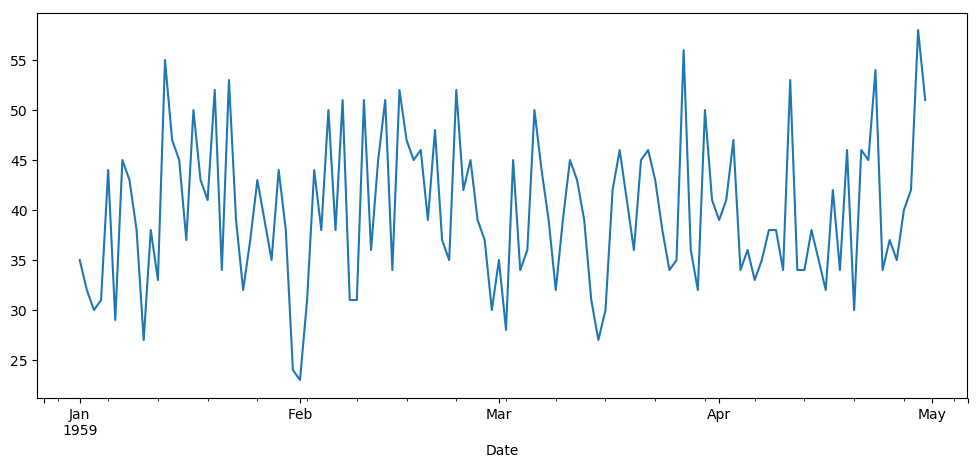

In [187]:
df1['Births'].plot(figsize=(12,5));

In [188]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [189]:
auto_arima(df1['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(0, 0)   Log Likelihood                -409.745
Method:                           css   S.D. of innovations              7.357
Date:                Wed, 06 Dec 2023   AIC                            823.489
Time:                        20:50:36   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7833      0.672     59.240      0.000      38.467      41.100
==============================================================================
"""

In [190]:
# spliting the data into training set and testing set

In [191]:
# Set one month for testing
train = df1.iloc[:90]
test = df1.iloc[90:]

In [192]:
model = ARMA(train['Births'],order=(2,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Wed, 06 Dec 2023   AIC                            627.809
Time:                        20:50:45   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [193]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

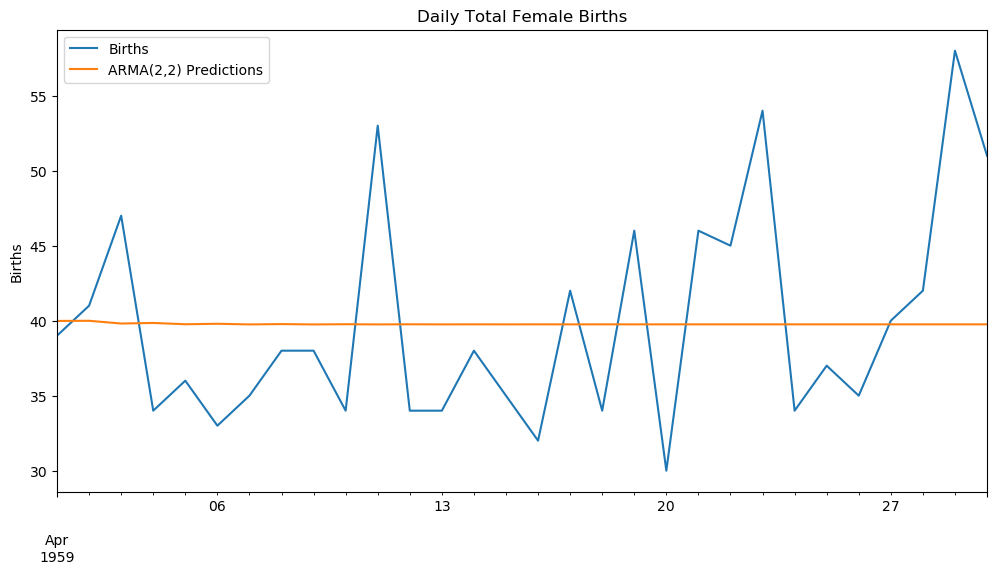

In [194]:
title = 'Daily Total Female Births'
ylabel='Births'
xlabel='' # we don't really need a label here

ax = test['Births'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [195]:
#66 ARMA and ARIMA -AutoRegressive Integrated Moving Average - Part Two

In [196]:
from statsmodels.tsa.seasonal import seasonal_decompose

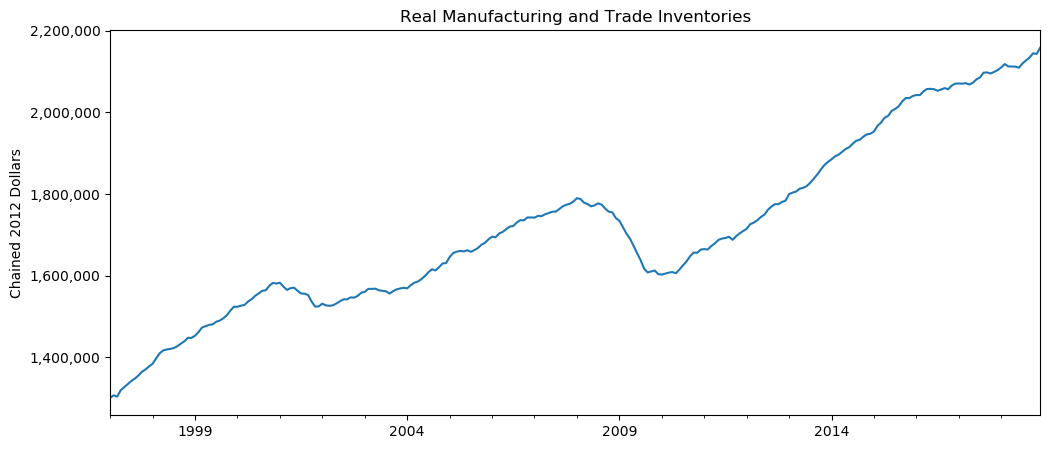

In [197]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = df2['Inventories'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);


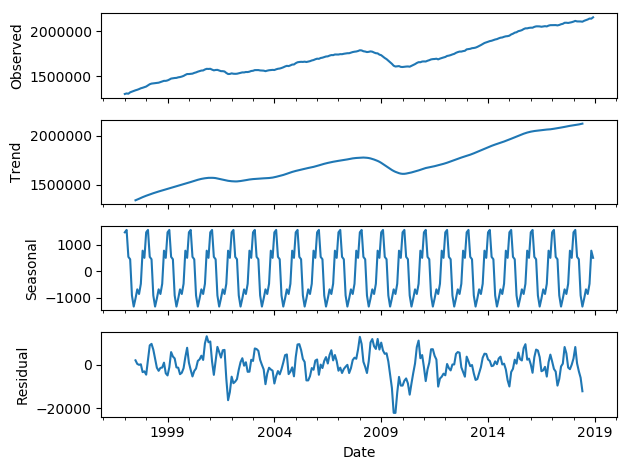

In [198]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2['Inventories'], model='additive')  # model='add' also works
result.plot();

In [199]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.259
Date:                Wed, 06 Dec 2023   AIC                           5228.505
Time:                        20:51:02   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3466.9221   1313.333      2.640      0.009     892.837    6041.007
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7447           +0.0000j            1.7447            0.0000
-----------------------------------------------------------------------------
"""

In [200]:
from statsmodels.tsa.statespace.tools import diff

In [201]:
df2['Diff_1']= diff(df2['Inventories'],k_diff=1)

In [202]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


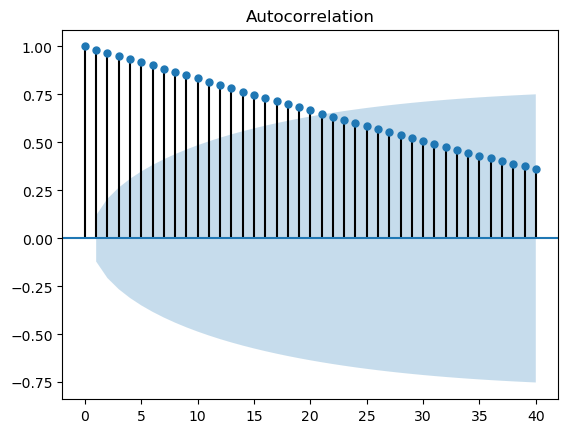

In [203]:
plot_acf(df2['Inventories'],lags=40);

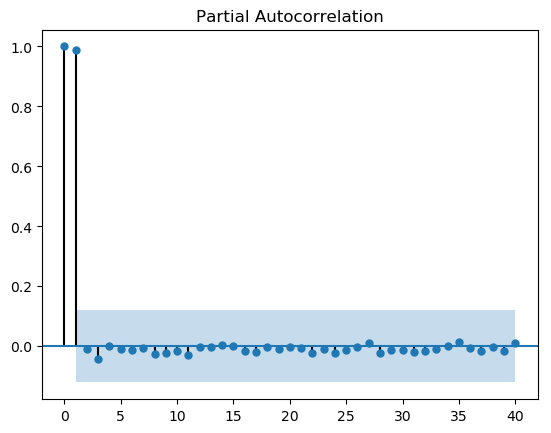

In [204]:
plot_pacf(df2['Inventories'],lags=40);

In [205]:
# AR =1
# I=1
# MA =0 or 1 #less error

In [206]:
stepwise_fit = auto_arima(df2['Inventories'],start_p=0,start_q=0,max_p=2,max_q=2,seasonal=False,trace=True)
stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.087 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.811, Fit time=0.045 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.842, Fit time=0.209 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.530, BIC=5247.390, Fit time=0.248 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.225 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.380 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 1.248 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.259
Date:                Wed, 06 Dec 2023   AIC                           5228.505
Time:                        20:51:08   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3466.9221   1313.333      2.640      0.009     892.837    6041.007
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7447           +0.0000j            1.7447            0.0000
-----------------------------------------------------------------------------
"""

In [207]:
len(df2)

264

In [208]:
train = df2.iloc[:252]
test =df2.iloc[252:]

In [209]:
model = ARIMA(train['Inventories'],order=(1,1,1))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.399
Method:                       css-mle   S.D. of innovations           4845.106
Date:                Wed, 06 Dec 2023   AIC                           4980.798
Time:                        20:51:26   BIC                           4994.900
Sample:                    02-01-1997   HQIC                          4986.473
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3127.2443   1346.138      2.323      0.021     488.863    5765.626
ar.L1.D.Inventories     0.9026      0.039     23.004      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.049      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1079           +0.0000j            1.1079            0.0000
MA.1            1.7919           +0.0000j            1.7919            0.0000
-----------------------------------------------------------------------------
"""

In [210]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, typ='levels').rename('ARMA(1,1,1) Predictions')

In [211]:
predictions

2018-01-01    2.107133e+06
2018-02-01    2.110490e+06
2018-03-01    2.113825e+06
2018-04-01    2.117139e+06
2018-05-01    2.120435e+06
2018-06-01    2.123715e+06
2018-07-01    2.126980e+06
2018-08-01    2.130231e+06
2018-09-01    2.133471e+06
2018-10-01    2.136699e+06
2018-11-01    2.139918e+06
2018-12-01    2.143128e+06
Freq: MS, Name: ARMA(1,1,1) Predictions, dtype: float64

In [212]:
test

Inventories   Diff_1
Date                            
2018-01-01      2110158   6407.0
2018-02-01      2118199   8041.0
2018-03-01      2112427  -5772.0
2018-04-01      2112276   -151.0
2018-05-01      2111835   -441.0
2018-06-01      2109298  -2537.0
2018-07-01      2119618  10320.0
2018-08-01      2127170   7552.0
2018-09-01      2134172   7002.0
2018-10-01      2144639  10467.0
2018-11-01      2143001  -1638.0
2018-12-01      2158115  15114.0

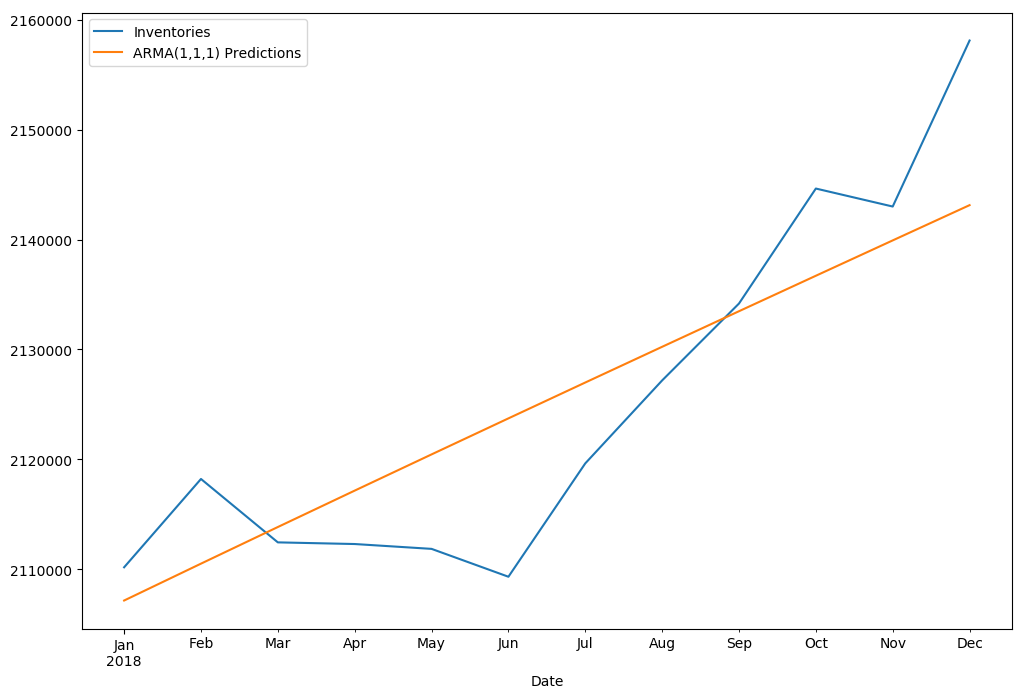

In [213]:
test['Inventories'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [214]:
from statsmodels.tools.eval_measures import rmse

In [215]:
error =rmse(test['Inventories'],predictions)


In [216]:
error

7838.092804146098

In [217]:
test['Inventories'].mean()

2125075.6666666665

In [218]:
predictions.mean()

2125263.655583225

In [219]:
#Forecast into Unknown Future

In [220]:
model =ARIMA(df2['Inventories'],order=(1,1,1))

In [221]:
results =model.fit()

In [222]:
fcast =results.predict(start=len(df2),end=len(df2)+11,typ='levels').rename('ARIMA (1,1,1) FORECAST')

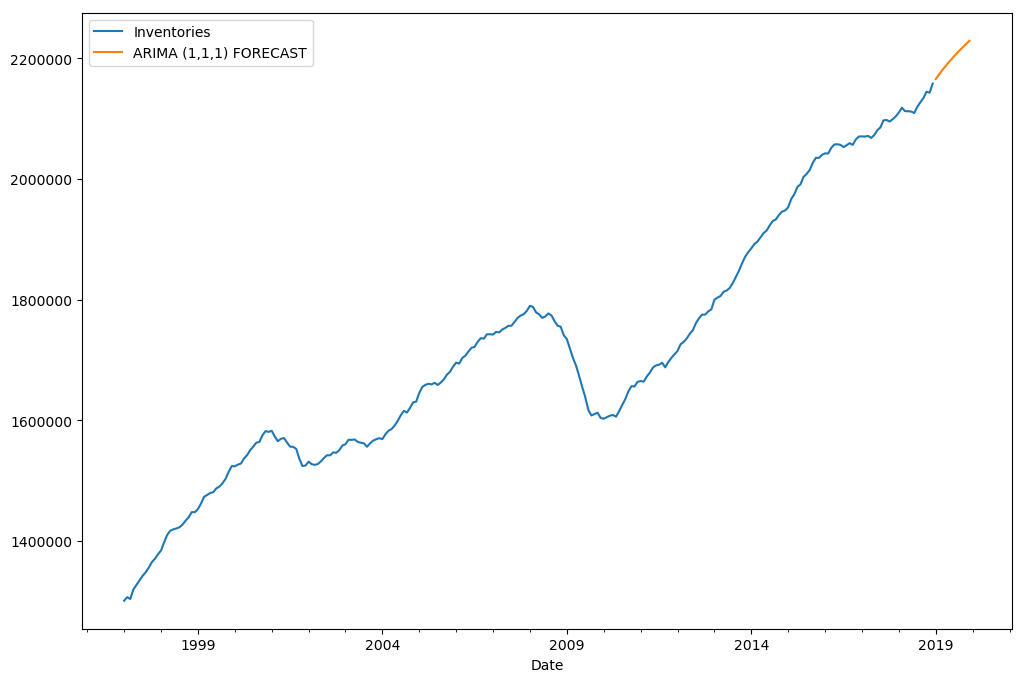

In [223]:
df2['Inventories'].plot(legend=True,figsize=(12,8))
fcast.plot(legend=True)

# 66 SARIMA - Seasonal Autoregressive Integrated Moving Averages

In [149]:
import pandas as pd
import numpy as np
%matplotlib inline

In [150]:
import warnings
warnings.filterwarnings("ignore")

In [151]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [152]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [153]:
from pmdarima import auto_arima

In [154]:
df =pd.read_csv('co2_mm_mlo.csv')

In [155]:
df.head()

year  month  decimal_date  average  interpolated
0  1958      3      1958.208   315.71        315.71
1  1958      4      1958.292   317.45        317.45
2  1958      5      1958.375   317.50        317.50
3  1958      6      1958.458      NaN        317.10
4  1958      7      1958.542   315.86        315.86

In [156]:



df['date']=pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [157]:
df.head()

year  month  decimal_date  average  interpolated       date
0  1958      3      1958.208   315.71        315.71 1958-03-01
1  1958      4      1958.292   317.45        317.45 1958-04-01
2  1958      5      1958.375   317.50        317.50 1958-05-01
3  1958      6      1958.458      NaN        317.10 1958-06-01
4  1958      7      1958.542   315.86        315.86 1958-07-01

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
year            729 non-null int64
month           729 non-null int64
decimal_date    729 non-null float64
average         722 non-null float64
interpolated    729 non-null float64
date            729 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.2 KB


In [159]:
df=df.set_index('date')

In [160]:
df.head()

year  month  decimal_date  average  interpolated
date                                                        
1958-03-01  1958      3      1958.208   315.71        315.71
1958-04-01  1958      4      1958.292   317.45        317.45
1958-05-01  1958      5      1958.375   317.50        317.50
1958-06-01  1958      6      1958.458      NaN        317.10
1958-07-01  1958      7      1958.542   315.86        315.86

In [161]:
df.index.freq = 'MS'

In [162]:
df.head()

year  month  decimal_date  average  interpolated
date                                                        
1958-03-01  1958      3      1958.208   315.71        315.71
1958-04-01  1958      4      1958.292   317.45        317.45
1958-05-01  1958      5      1958.375   317.50        317.50
1958-06-01  1958      6      1958.458      NaN        317.10
1958-07-01  1958      7      1958.542   315.86        315.86

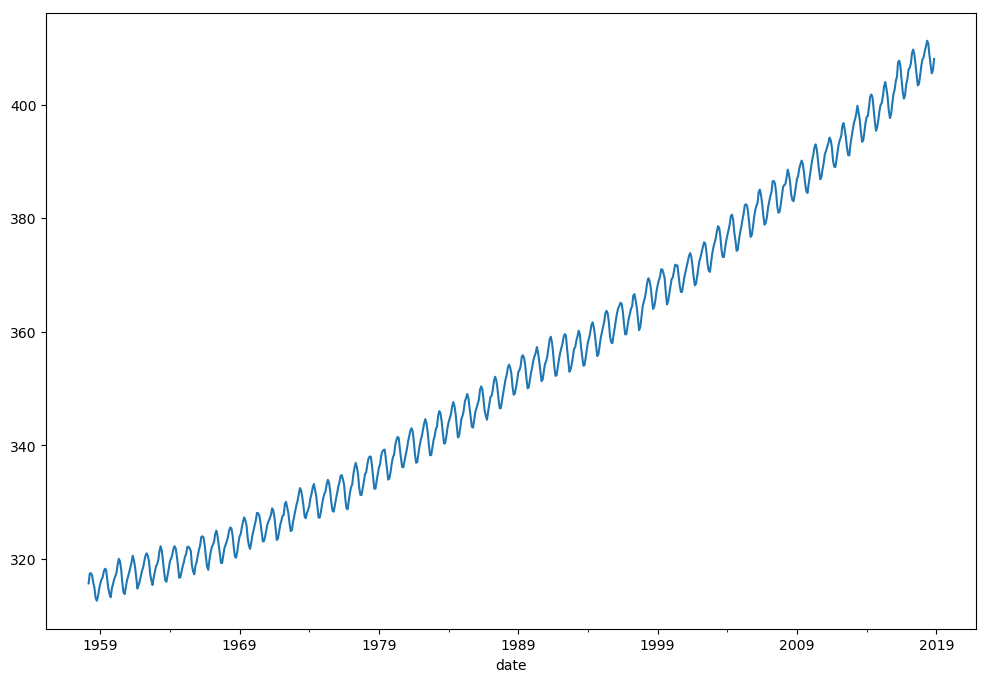

In [163]:
df['interpolated'].plot(figsize=(12,8))

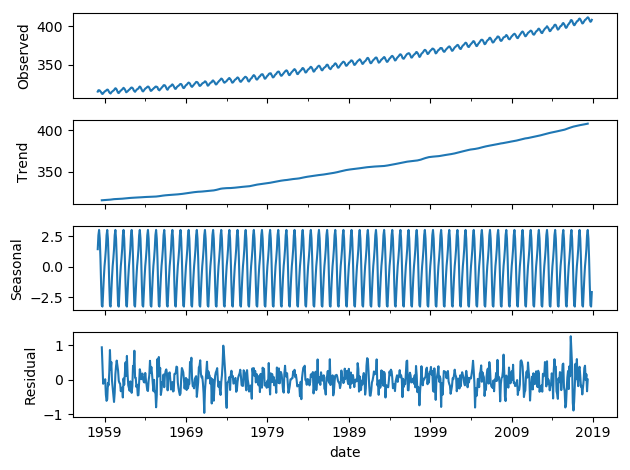

In [164]:
result =seasonal_decompose(df['interpolated'],model='add')
result.plot();

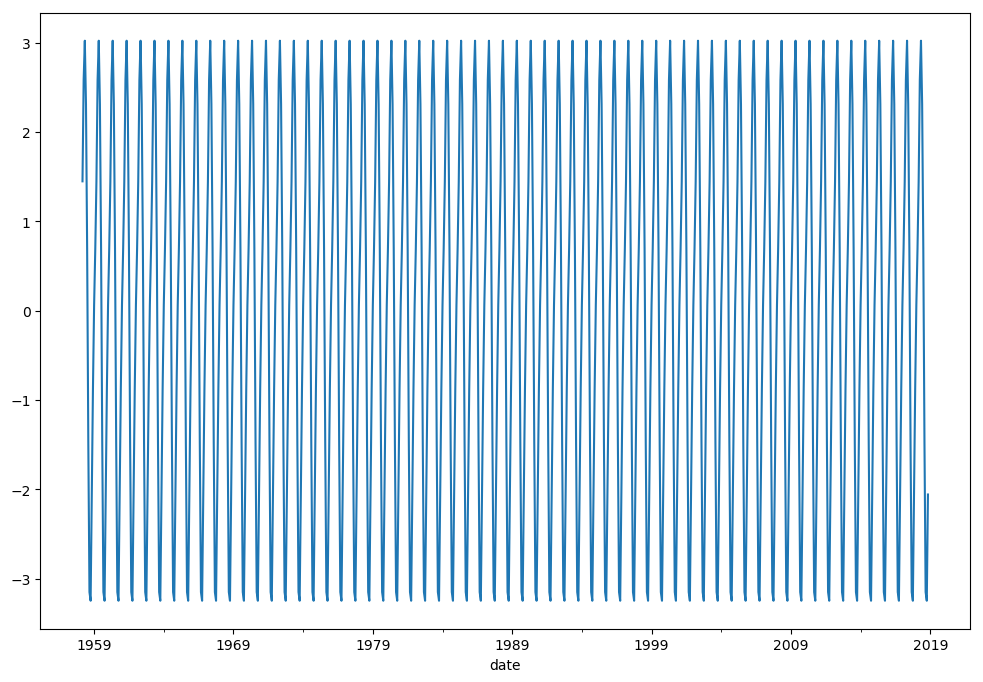

In [165]:
result.seasonal.plot(figsize=(12,8))

In [166]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -207.448
Date:                            Thu, 07 Dec 2023   AIC                            424.897
Time:                                    16:20:21   BIC                            447.848
Sample:                                         0   HQIC                           433.753
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.001      0.993      0.320      -0.001       0.002
ma.L1         -0.3805      0.034    -11.195      0.000      -0.447      -0.314
ar.S.L12       0.9996      0.000   3215.480      0.000       0.999       1.000
ma.S.L12      -0.8647      0.021    -40.394      0.000      -0.907      -0.823
sigma2         0.0962      0.005     20.392      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       52.16   Jarque-Bera (JB):                 3.75
Prob(Q):                              0.09   Prob(JB):                         0.15
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
len(df)

729

In [168]:

train=df.iloc[:717]

In [169]:
test =df.iloc[717:]

In [170]:
model =SARIMAX(train['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))

In [171]:
result=model.fit()

In [172]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.149
Date:                            Thu, 07 Dec 2023   AIC                            418.298
Time:                                    16:20:25   BIC                            436.593
Sample:                                03-01-1958   HQIC                           425.363
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3697      0.034    -10.998      0.000      -0.436      -0.304
ar.S.L12       0.9997      0.000   3217.673      0.000       0.999       1.000
ma.S.L12      -0.8652      0.023    -37.816      0.000      -0.910      -0.820
sigma2         0.0959      0.005     20.236      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.99   Jarque-Bera (JB):                 3.78
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [173]:
start =len(train)

In [174]:
end=len(train)+len(test)-1

In [175]:
predictions=result.predict(start,end,typ='levels').rename('SARIMA Predictions')

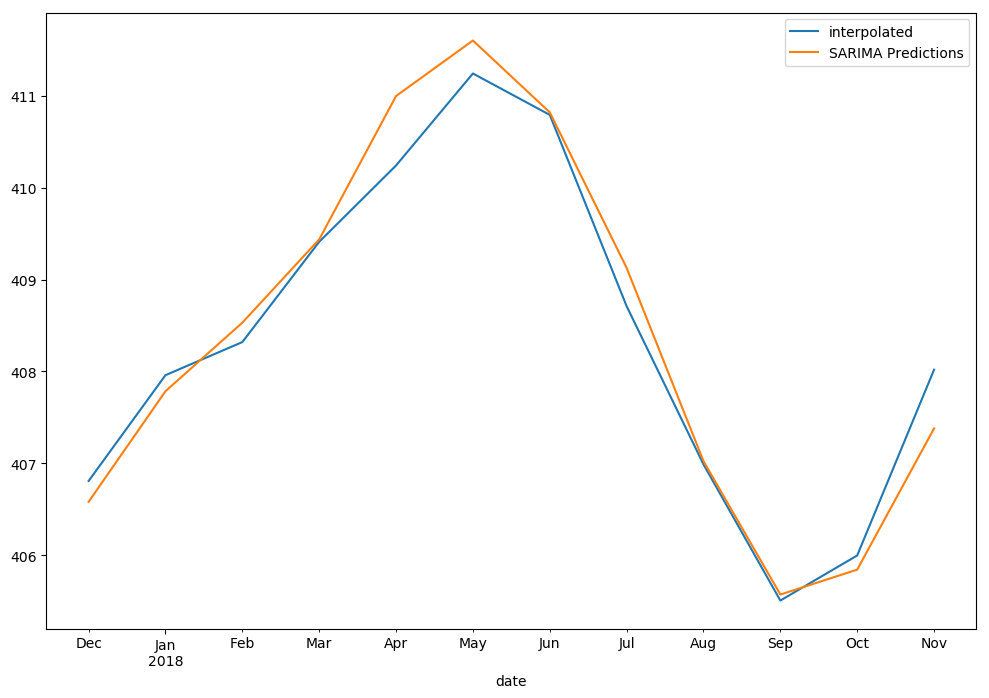

In [176]:
test['interpolated'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [177]:
from statsmodels.tools.eval_measures import rmse

In [178]:
error =rmse(test['interpolated'],predictions)

In [179]:
error

0.3460938596091945

In [180]:
test['interpolated'].mean()

408.3333333333333

# FORECAST INTO THE UNKNOWN FUTURE

In [181]:
model =SARIMAX(df['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))
result=model.fit()

In [182]:
fcast=result.predict(len(df),len(df)+11,typ='levels').rename('SARIMA FORECAST')

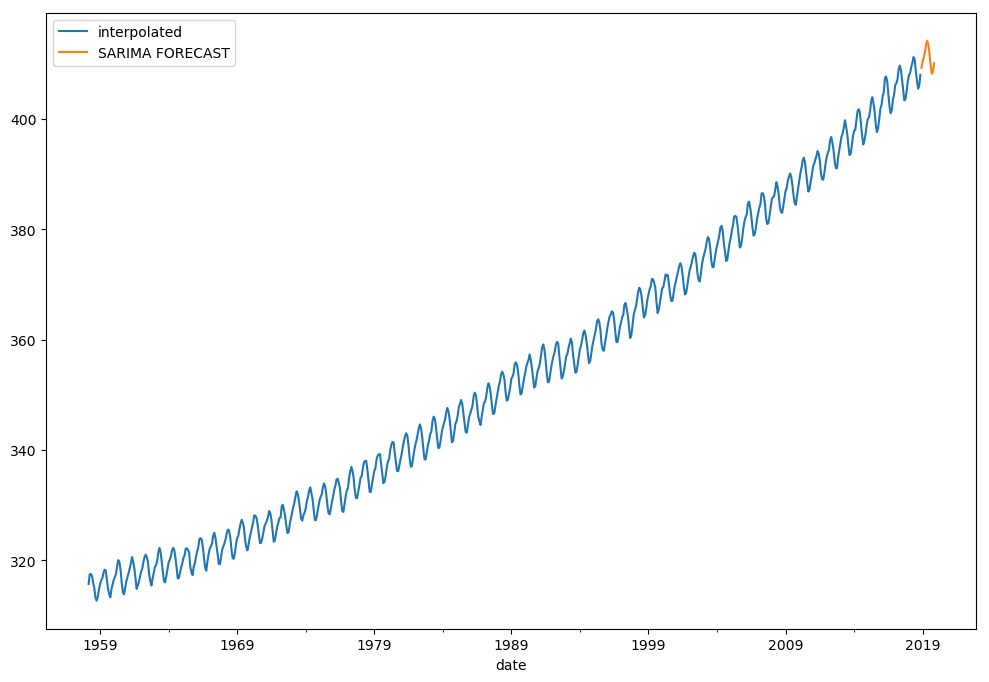

In [183]:
df['interpolated'].plot(legend=True,figsize=(12,8))
fcast.plot(legend=True)

# 67 SARIMAX Models Part One

In [184]:
import pandas as pd
import numpy as np
%matplotlib inline

In [185]:
#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [186]:
df =pd.read_csv('RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [187]:
df.index.freq='D'

In [188]:
df.head()

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                        
2016-01-01    Friday        1  New Year's Day   65.0   25.0   67.0  139.0   
2016-01-02  Saturday        0              na   24.0   39.0   43.0   85.0   
2016-01-03    Sunday        0              na   24.0   31.0   66.0   81.0   
2016-01-04    Monday        0              na   23.0   18.0   32.0   32.0   
2016-01-05   Tuesday        0              na    2.0   15.0   38.0   43.0   

            total  
date               
2016-01-01  296.0  
2016-01-02  191.0  
2016-01-03  202.0  
2016-01-04  105.0  
2016-01-05   98.0

In [189]:
df.tail()

weekday  holiday  holiday_name  rest1  rest2  rest3  rest4  \
date                                                                       
2017-05-27   Saturday        0            na    NaN    NaN    NaN    NaN   
2017-05-28     Sunday        0            na    NaN    NaN    NaN    NaN   
2017-05-29     Monday        1  Memorial Day    NaN    NaN    NaN    NaN   
2017-05-30    Tuesday        0            na    NaN    NaN    NaN    NaN   
2017-05-31  Wednesday        0            na    NaN    NaN    NaN    NaN   

            total  
date               
2017-05-27    NaN  
2017-05-28    NaN  
2017-05-29    NaN  
2017-05-30    NaN  
2017-05-31    NaN

In [190]:
df1=df.dropna()

In [191]:
df1.tail()

weekday  holiday holiday_name  rest1  rest2  rest3  rest4  total
date                                                                          
2017-04-18    Tuesday        0           na   30.0   30.0   13.0   18.0   91.0
2017-04-19  Wednesday        0           na   20.0   11.0   30.0   18.0   79.0
2017-04-20   Thursday        0           na   22.0    3.0   19.0   46.0   90.0
2017-04-21     Friday        0           na   38.0   53.0   36.0   38.0  165.0
2017-04-22   Saturday        0           na   97.0   20.0   50.0   59.0  226.0

In [192]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [193]:
cols =['rest1', 'rest2', 'rest3','rest4', 'total']

In [194]:
for column in cols:
    df1[column]=df1[column].astype(int)

In [195]:
df1.head()

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                        
2016-01-01    Friday        1  New Year's Day     65     25     67    139   
2016-01-02  Saturday        0              na     24     39     43     85   
2016-01-03    Sunday        0              na     24     31     66     81   
2016-01-04    Monday        0              na     23     18     32     32   
2016-01-05   Tuesday        0              na      2     15     38     43   

            total  
date               
2016-01-01    296  
2016-01-02    191  
2016-01-03    202  
2016-01-04    105  
2016-01-05     98

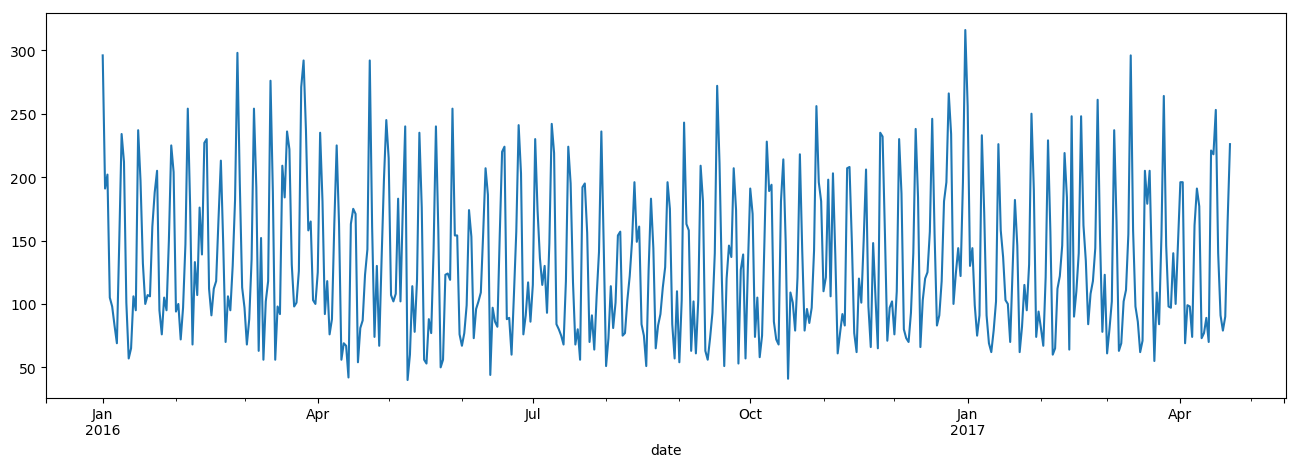

In [196]:
df['total'].plot(figsize=(16,5))

In [197]:
df1.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [198]:
df1[df1['holiday']==1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

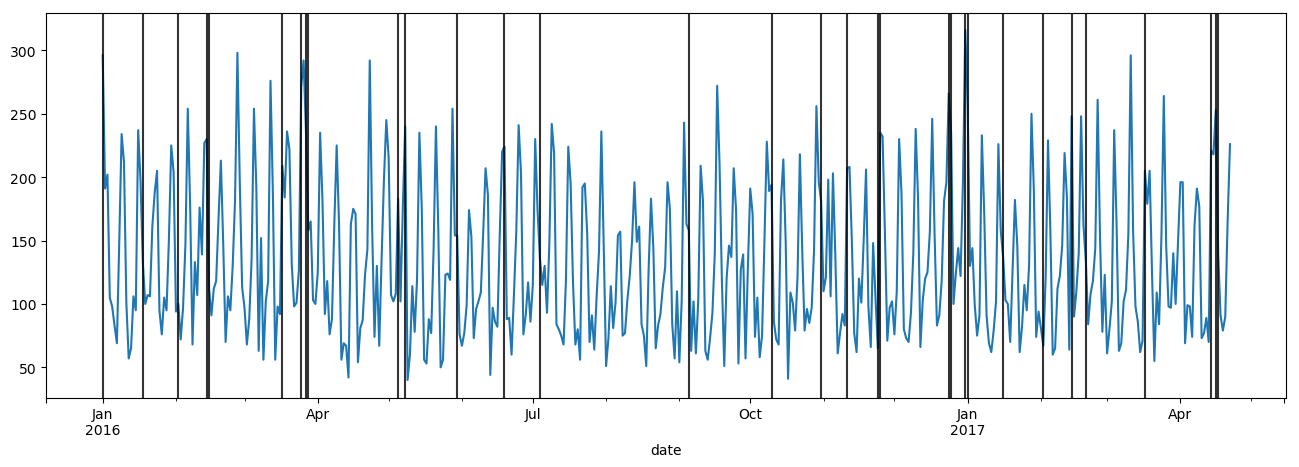

In [199]:
ax =df1['total'].plot(figsize=(16,5))
for day in df1.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.8);

In [200]:
from statsmodels.tsa.seasonal import seasonal_decompose

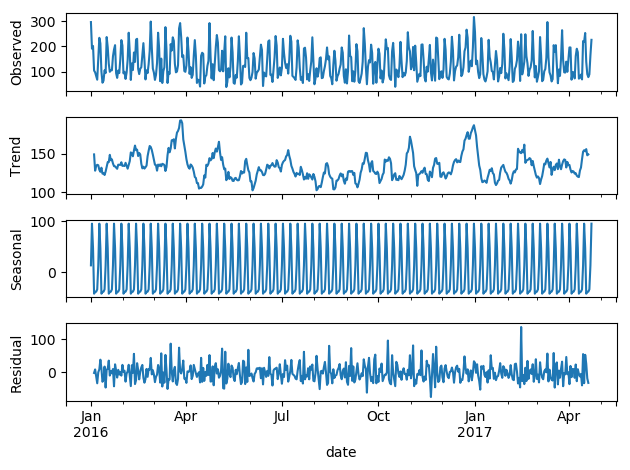

In [201]:
result=seasonal_decompose(df1['total'])
result.plot();

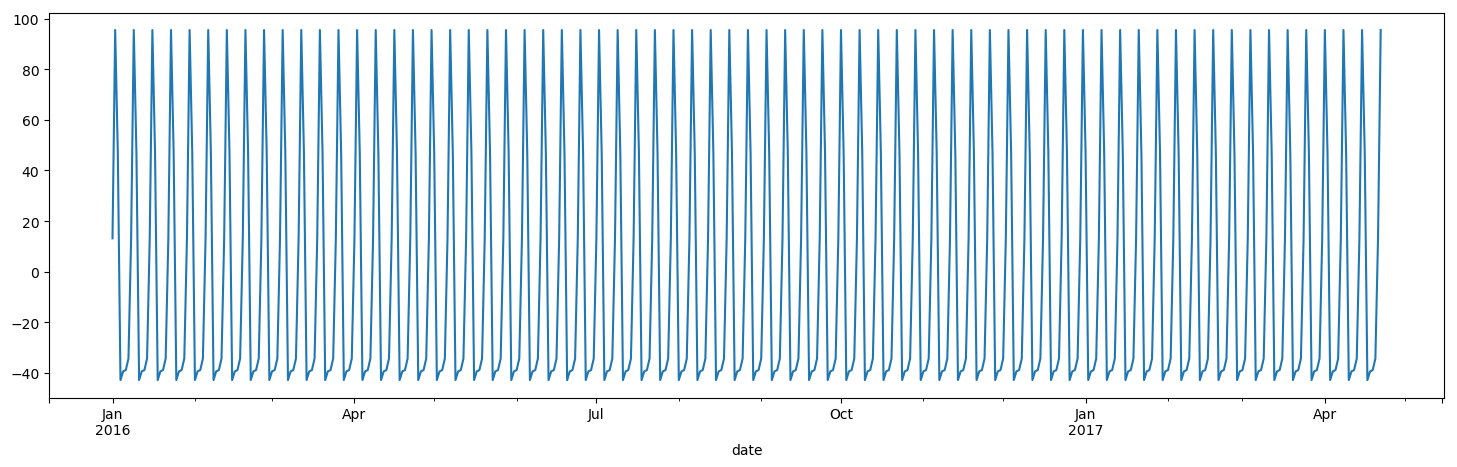

In [202]:
result.seasonal.plot(figsize=(18,5))

In [203]:
len(df1)

478

In [204]:
train =df1.iloc[:436]

In [205]:
test =df1.iloc[436:]

In [206]:
from pmdarima import auto_arima

In [207]:
auto_arima(df1['total'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Thu, 07 Dec 2023   AIC                           4845.442
Time:                                   16:21:00   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5668      4.363      4.714      0.000      12.016      29.118
ar.L1          0.1897      0.045      4.221      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.3947     86.678     16.468      0.000    1257.508    1597.281
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [208]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [209]:
#
model =SARIMAX(train['total'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)

In [210]:
results=model.fit()

In [211]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Thu, 07 Dec 2023   AIC                           4457.403
Time:                                   16:21:00   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [212]:
start =len(train)
end=len(train)+len(test)-1

In [213]:
predictions=results.predict(start,end).rename('SARIMA Model')

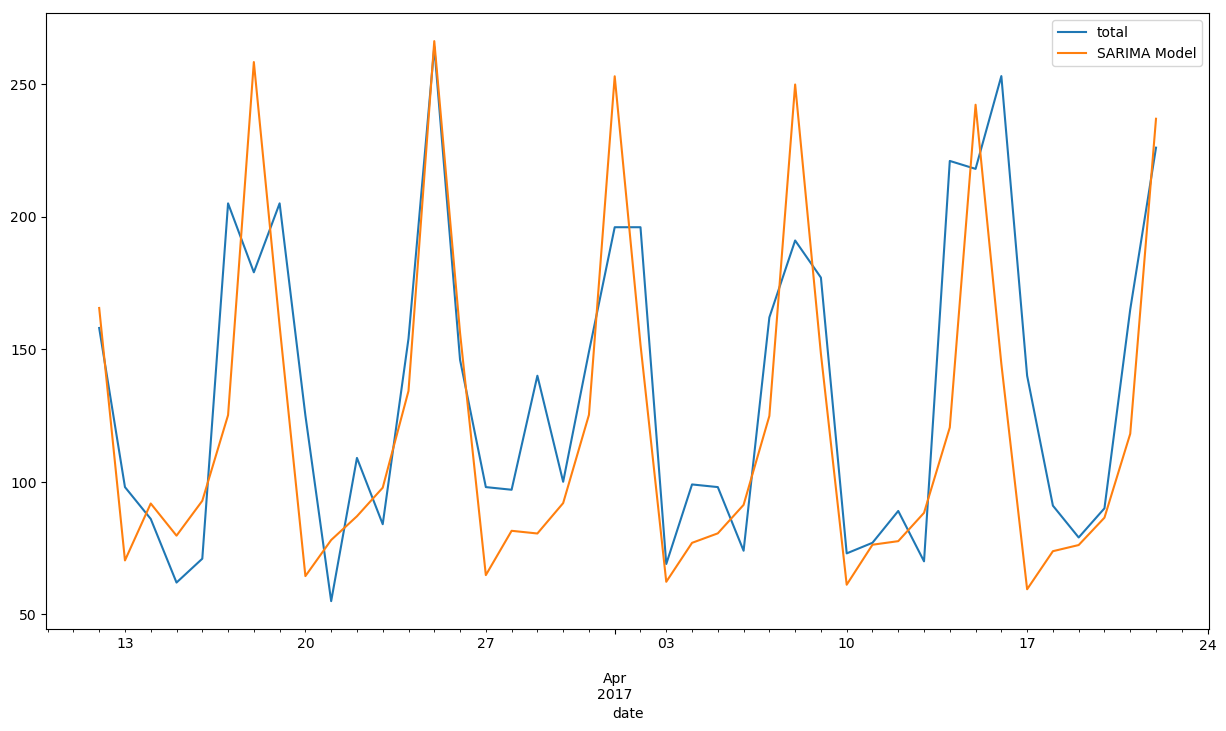

In [214]:
test['total'].plot(legend=True,figsize=(15,8))
predictions.plot(legend=True)
for day in test.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.9);

In [215]:
from statsmodels.tools.eval_measures import mse,rmse

In [216]:
rmse(test['total'],predictions)

41.26315500566224

In [217]:
test['total'].mean()

134.26190476190476

In [218]:
# 69 SARIMAX  part 3

In [219]:
auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2348.617
Date:                           Thu, 07 Dec 2023   AIC                           4709.235
Time:                                   16:21:41   BIC                           4734.253
Sample:                                        0   HQIC                          4719.070
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5525      4.275      2.702      0.007       3.174      19.931
x1            74.8048      4.544     16.464      0.000      65.900      83.710
ma.L1          0.1781      0.051      3.473      0.001       0.078       0.279
ar.S.L7        0.5062      0.045     11.240      0.000       0.418       0.595
ar.S.L14       0.3844      0.043      8.986      0.000       0.301       0.468
sigma2      1141.8235     80.169     14.243      0.000     984.695    1298.952
===================================================================================
Ljung-Box (Q):                       85.15   Jarque-Bera (JB):                 1.77
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.12
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# TRAIN our SARIMA

In [220]:
model=SARIMAX(train['total'],exog=train[['holiday']],order=(0,0,1),seasonal_order=(2,0,0,7),enforce_invertibility=False)

In [221]:
result = model.fit()

In [223]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2158.891
Date:                           Thu, 07 Dec 2023   AIC                           4327.783
Time:                                   16:22:55   BIC                           4348.171
Sample:                               01-01-2016   HQIC                          4335.829
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       67.9545      4.278     15.886      0.000      59.570      76.339
ma.L1          0.2057      0.050      4.117      0.000       0.108       0.304
ar.S.L7        0.5146      0.042     12.369      0.000       0.433       0.596
ar.S.L14       0.4598      0.041     11.135      0.000       0.379       0.541
sigma2      1118.0418     73.446     15.223      0.000     974.090    1261.994
===================================================================================
Ljung-Box (Q):                      101.65   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.00   Prob(JB):                         0.52
Heteroskedasticity (H):               0.90   Skew:                             0.11
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [224]:
start=len(train)
end= len(train) + len(test)-1

In [225]:
predictions = result.predict(start,end,exog=test[['holiday']]).rename("SARIMAX with Exog")

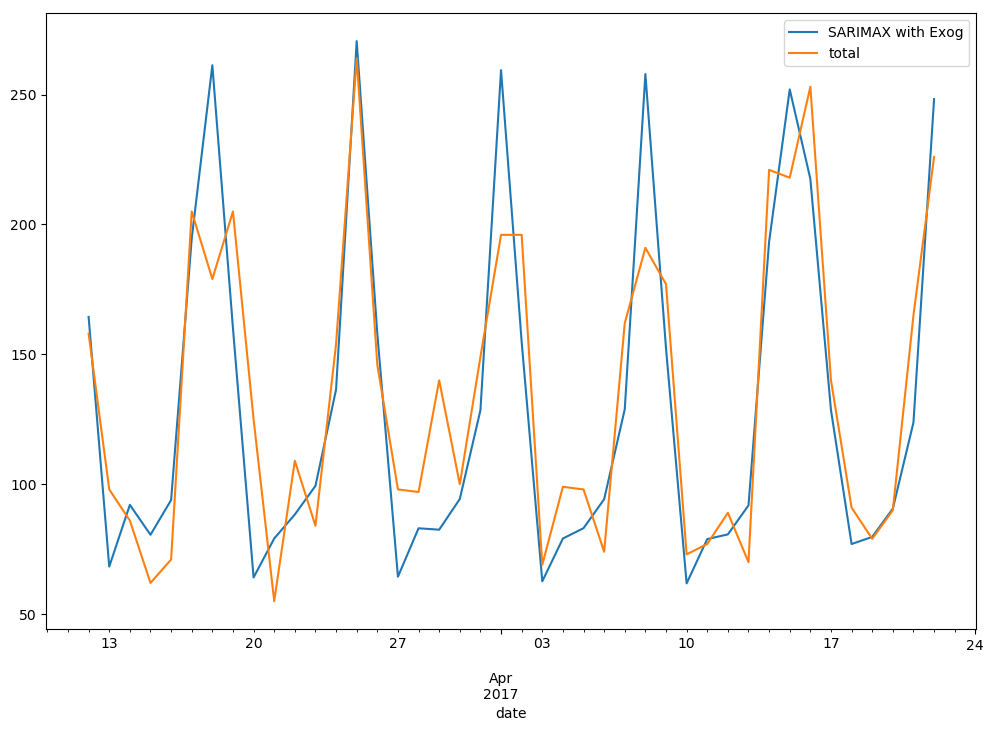

In [226]:
predictions.plot(figsize=(12,8),legend=True)
test['total'].plot(legend=True)

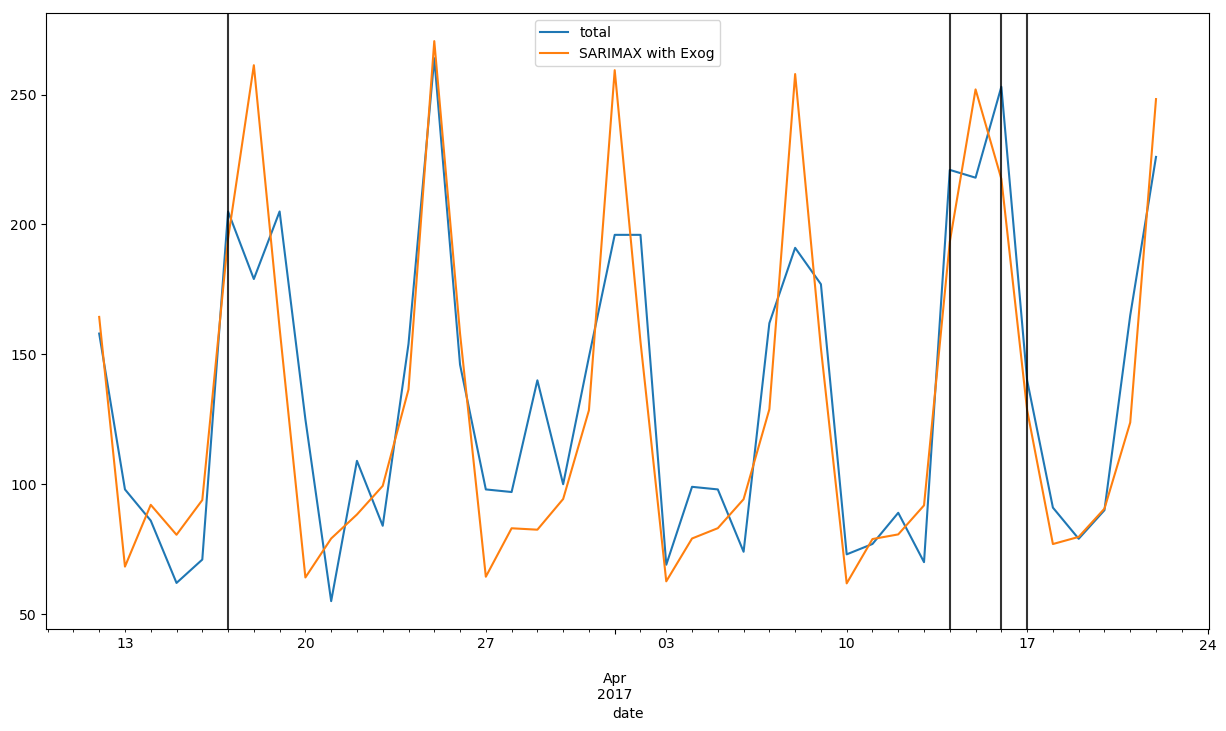

In [228]:
ax=test['total'].plot(legend=True,figsize=(15,8))
predictions.plot(legend=True)

for x in test.query('holiday==1').index:
    ax.axvline(x=x,color='k',alpha=0.8);

In [229]:
rmse(test['total'],predictions)

31.09251512844278

In [233]:
model=SARIMAX(df1['total'],exo=df1[['holiday']],order=(1,0,1),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [234]:
results=model.fit()

In [235]:
df.tail()

weekday  holiday  holiday_name  rest1  rest2  rest3  rest4  \
date                                                                       
2017-05-27   Saturday        0            na    NaN    NaN    NaN    NaN   
2017-05-28     Sunday        0            na    NaN    NaN    NaN    NaN   
2017-05-29     Monday        1  Memorial Day    NaN    NaN    NaN    NaN   
2017-05-30    Tuesday        0            na    NaN    NaN    NaN    NaN   
2017-05-31  Wednesday        0            na    NaN    NaN    NaN    NaN   

            total  
date               
2017-05-27    NaN  
2017-05-28    NaN  
2017-05-29    NaN  
2017-05-30    NaN  
2017-05-31    NaN

In [238]:
exog_forecast=df[477:][['holiday']]

In [239]:
exog_forecast

holiday
date               
2017-04-22        0
2017-04-23        0
2017-04-24        0
2017-04-25        0
2017-04-26        0
2017-04-27        0
2017-04-28        0
2017-04-29        0
2017-04-30        0
2017-05-01        0
2017-05-02        0
2017-05-03        0
2017-05-04        0
2017-05-05        1
2017-05-06        0
2017-05-07        0
2017-05-08        0
2017-05-09        0
2017-05-10        0
2017-05-11        0
2017-05-12        0
2017-05-13        0
2017-05-14        1
2017-05-15        0
2017-05-16        0
2017-05-17        0
2017-05-18        0
2017-05-19        0
2017-05-20        0
2017-05-21        0
2017-05-22        0
2017-05-23        0
2017-05-24        0
2017-05-25        0
2017-05-26        0
2017-05-27        0
2017-05-28        0
2017-05-29        1
2017-05-30        0
2017-05-31        0

In [240]:
fcast=results.predict(len(df1),len(df1)+38,exog=exog_forecast).rename("FINAL SARIMA FORECAST")

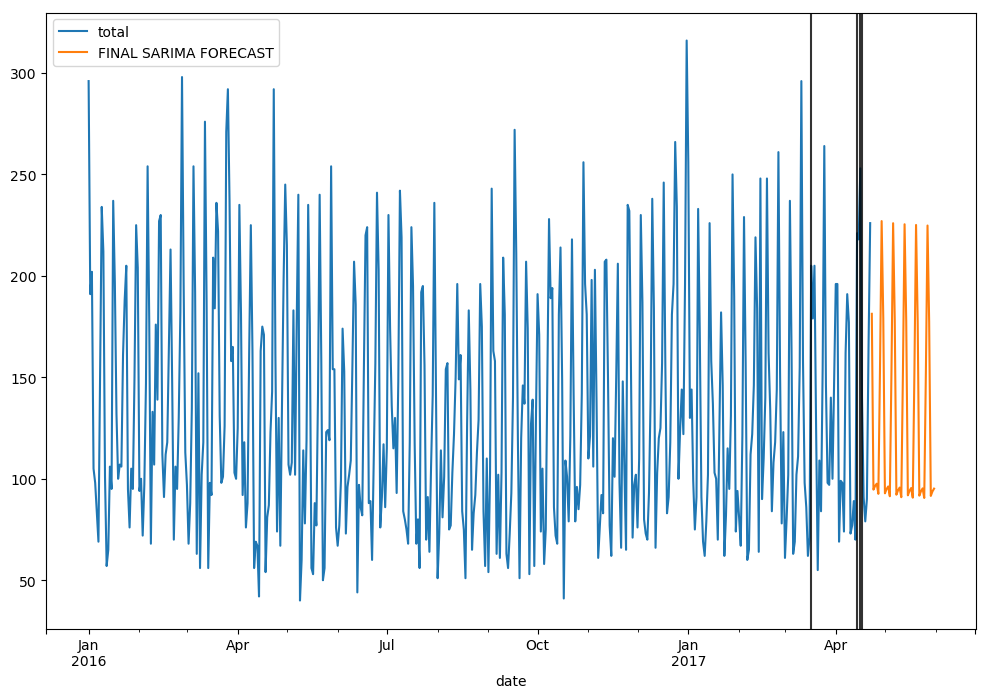

In [242]:
ax=df1['total'].plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)

for x in test.query('holiday==1').index:
    ax.axvline(x=x,color='k',alpha=0.8);

In [243]:
#70 Vector AutoRegression - VAR

In [1]:
#71 VAR code along

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

#load specific forecasting tools
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse


#ignore harmless warnings 
import warnings
warnings.filterwarnings("ignore")

#Load a no-stationary dataset
df=pd.read_csv("M2SLMoneyStock.csv",index_col=0,parse_dates=True)
df.index.freq = 'MS'

#load a stationary dataset
sp=pd.read_csv('PCEPersonalSpending.csv',index_col=0,parse_dates=True)
sp.index.freq = 'MS'

In [3]:
df.head()

Money
Date              
1995-01-01  3492.4
1995-02-01  3489.9
1995-03-01  3491.1
1995-04-01  3499.2
1995-05-01  3524.2

In [4]:
sp.head()

Spending
Date                
1995-01-01    4851.2
1995-02-01    4850.8
1995-03-01    4885.4
1995-04-01    4890.2
1995-05-01    4933.1

In [5]:
df=df.join(sp)

In [6]:
df

Money  Spending
Date                         
1995-01-01   3492.4    4851.2
1995-02-01   3489.9    4850.8
1995-03-01   3491.1    4885.4
1995-04-01   3499.2    4890.2
1995-05-01   3524.2    4933.1
1995-06-01   3548.9    4977.5
1995-07-01   3567.4    4970.2
1995-08-01   3589.0    5005.3
1995-09-01   3602.1    5020.5
1995-10-01   3613.4    5013.9
1995-11-01   3619.9    5055.6
1995-12-01   3629.5    5097.5
1996-01-01   3647.9    5085.7
1996-02-01   3661.9    5132.8
1996-03-01   3687.0    5173.3
1996-04-01   3697.8    5208.0
1996-05-01   3709.7    5223.8
1996-06-01   3722.7    5229.8
1996-07-01   3737.3    5251.9
1996-08-01   3744.3    5275.0
1996-09-01   3753.7    5296.6
1996-10-01   3771.0    5328.5
1996-11-01   3790.2    5351.2
1996-12-01   3810.5    5378.6
1997-01-01   3824.8    5411.1
1997-02-01   3836.4    5434.0
1997-03-01   3851.3    5454.2
1997-04-01   3867.4    5459.3
1997-05-01   3879.2    5460.2
1997-06-01   3896.0    5494.2
...             ...       ...
2013-07-01  10721.7   11296.7
2013-08-01  10780.1   11329.2
2013-09-01  10832.5   11366.9
2013-10-01  10945.4   11419.8
2013-11-01  10953.1   11487.6
2013-12-01  11015.7   11517.9
2014-01-01  11066.2   11512.5
2014-02-01  11148.7   11566.2
2014-03-01  11190.3   11643.0
2014-04-01  11246.7   11702.6
2014-05-01  11314.4   11748.4
2014-06-01  11366.6   11817.0
2014-07-01  11427.8   11860.5
2014-08-01  11457.1   11944.3
2014-09-01  11492.0   11957.4
2014-10-01  11552.4   12023.0
2014-11-01  11591.5   12051.4
2014-12-01  11670.1   12062.0
2015-01-01  11733.2   12046.0
2015-02-01  11852.4   12082.4
2015-03-01  11868.8   12158.3
2015-04-01  11916.1   12193.8
2015-05-01  11947.6   12268.1
2015-06-01  11993.1   12308.3
2015-07-01  12045.3   12355.4
2015-08-01  12096.8   12394.0
2015-09-01  12153.8   12392.8
2015-10-01  12187.7   12416.1
2015-11-01  12277.4   12450.1
2015-12-01  12335.9   12469.1

[252 rows x 2 columns]

In [7]:
df.shape

(252, 2)

In [8]:
df=df.dropna()

In [9]:
df.shape

(252, 2)

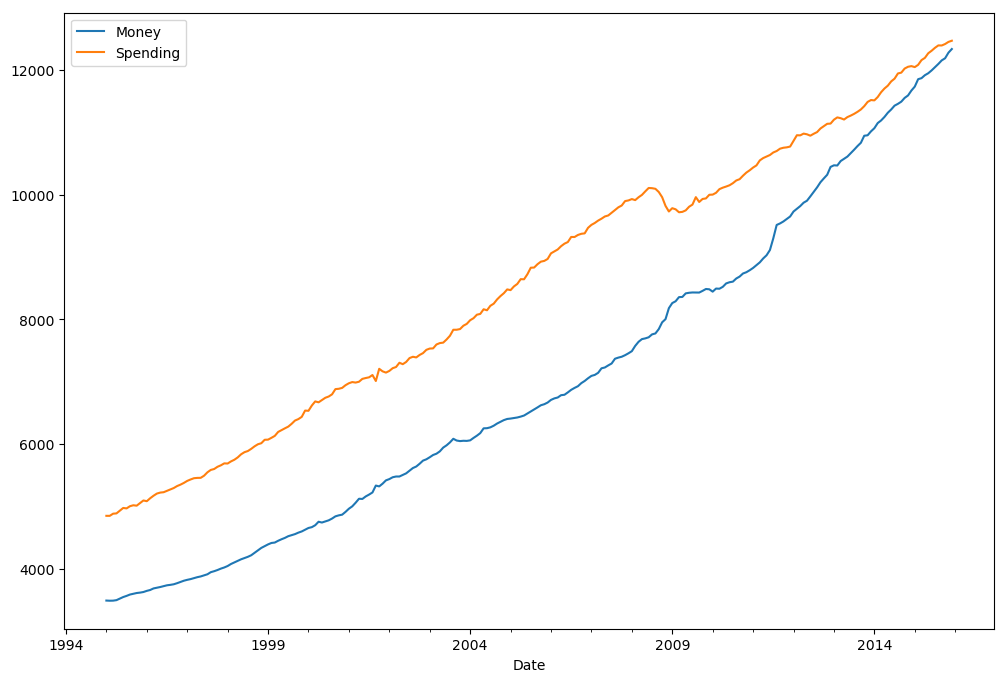

In [10]:
df.plot(figsize=(12,8))

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [12]:
adf_test(df['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [13]:
adf_test(df['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [14]:
df_transformed=df.diff()

In [23]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [15]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [16]:
df_transformed=df_transformed.diff().dropna()

In [17]:
df_transformed

Money  Spending
Date                       
1995-03-01    3.7      35.0
1995-04-01    6.9     -29.8
1995-05-01   16.9      38.1
1995-06-01   -0.3       1.5
1995-07-01   -6.2     -51.7
1995-08-01    3.1      42.4
1995-09-01   -8.5     -19.9
1995-10-01   -1.8     -21.8
1995-11-01   -4.8      48.3
1995-12-01    3.1       0.2
1996-01-01    8.8     -53.7
1996-02-01   -4.4      58.9
1996-03-01   11.1      -6.6
1996-04-01  -14.3      -5.8
1996-05-01    1.1     -18.9
1996-06-01    1.1      -9.8
1996-07-01    1.6      16.1
1996-08-01   -7.6       1.0
1996-09-01    2.4      -1.5
1996-10-01    7.9      10.3
1996-11-01    1.9      -9.2
1996-12-01    1.1       4.7
1997-01-01   -6.0       5.1
1997-02-01   -2.7      -9.6
1997-03-01    3.3      -2.7
1997-04-01    1.2     -15.1
1997-05-01   -4.3      -4.2
1997-06-01    5.0      33.1
1997-07-01    1.1      20.6
1997-08-01   15.7     -16.4
...           ...       ...
2013-07-01    1.6       3.7
2013-08-01    2.4       4.6
2013-09-01   -6.0       5.2
2013-10-01   60.5      15.2
2013-11-01 -105.2      14.9
2013-12-01   54.9     -37.5
2014-01-01  -12.1     -35.7
2014-02-01   32.0      59.1
2014-03-01  -40.9      23.1
2014-04-01   14.8     -17.2
2014-05-01   11.3     -13.8
2014-06-01  -15.5      22.8
2014-07-01    9.0     -25.1
2014-08-01  -31.9      40.3
2014-09-01    5.6     -70.7
2014-10-01   25.5      52.5
2014-11-01  -21.3     -37.2
2014-12-01   39.5     -17.8
2015-01-01  -15.5     -26.6
2015-02-01   56.1      52.4
2015-03-01 -102.8      39.5
2015-04-01   30.9     -40.4
2015-05-01  -15.8      38.8
2015-06-01   14.0     -34.1
2015-07-01    6.7       6.9
2015-08-01   -0.7      -8.5
2015-09-01    5.5     -39.8
2015-10-01  -23.1      24.5
2015-11-01   55.8      10.7
2015-12-01  -31.2     -15.0

[250 rows x 2 columns]

In [18]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [19]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [25]:
df_transformed.head()

Money  Spending
Date                       
1995-03-01    3.7      35.0
1995-04-01    6.9     -29.8
1995-05-01   16.9      38.1
1995-06-01   -0.3       1.5
1995-07-01   -6.2     -51.7

In [26]:
df_transformed.shape

(250, 2)

In [27]:
#Num of Observation
nobs=12

In [28]:
train =df_transformed[:-nobs]

In [29]:
test =df_transformed[-nobs:]

In [30]:
test

Money  Spending
Date                       
2015-01-01  -15.5     -26.6
2015-02-01   56.1      52.4
2015-03-01 -102.8      39.5
2015-04-01   30.9     -40.4
2015-05-01  -15.8      38.8
2015-06-01   14.0     -34.1
2015-07-01    6.7       6.9
2015-08-01   -0.7      -8.5
2015-09-01    5.5     -39.8
2015-10-01  -23.1      24.5
2015-11-01   55.8      10.7
2015-12-01  -31.2     -15.0

In [31]:
#GRID search for order, p AR of VAR model

In [32]:
model = VAR(train)

for p in [1,2,3,4,5,6,7]: # range(8)
    results =model.fit(p)
    print(f'ORDER {p}')
    print(f'AIC: {results.aic}') 
    print('\n')
    

ORDER 1
AIC: 14.178610495220896


ORDER 2
AIC: 13.955189367163705


ORDER 3
AIC: 13.849518291541038


ORDER 4
AIC: 13.827950574458283


ORDER 5
AIC: 13.78730034460964


ORDER 6
AIC: 13.799076756885809


ORDER 7
AIC: 13.797638727913972




In [33]:
results = model.fit(5)

In [34]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 21, Dec, 2023
Time:                     11:43:13
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [36]:
#GRAB 5 lagged value , right before the test starts!
#Numpy array

In [37]:
lagged_values=train.values[-5:]

In [38]:


z=results.forecast(y=lagged_values,steps=12)

In [39]:
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [40]:
idx = pd.date_range('2015-01-01',periods=12,freq='MS')

In [41]:
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [42]:
df_forecast=pd.DataFrame(data=z,index=idx,columns=['Money_2d','Spending_2d'])

In [43]:
df_forecast

Money_2d  Spending_2d
2015-01-01 -16.995276    36.149820
2015-02-01  -3.174038   -11.450298
2015-03-01  -0.377725    -6.684969
2015-04-01  -2.602233     5.479458
2015-05-01   4.228557    -2.443365
2015-06-01   1.559393     0.387639
2015-07-01  -0.998410     3.883680
2015-08-01   0.364510    -2.356101
2015-09-01  -1.210627    -1.224147
2015-10-01   0.225877     0.786927
2015-11-01   1.338939     0.180974
2015-12-01  -0.218585     0.212750

In [44]:
#REVERSE FIRST AND 2nd Difference
#Invert transformation

In [45]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [46]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [47]:
df_forecast.head()

Money_2d  Spending_2d    Money1d  MoneyForecast  Spending1d  \
2015-01-01 -16.995276    36.149820  61.604724   11731.704724   46.749820   
2015-02-01  -3.174038   -11.450298  58.430686   11790.135410   35.299522   
2015-03-01  -0.377725    -6.684969  58.052961   11848.188371   28.614552   
2015-04-01  -2.602233     5.479458  55.450728   11903.639099   34.094010   
2015-05-01   4.228557    -2.443365  59.679285   11963.318384   31.650645   

            SpendingForecast  
2015-01-01      12108.749820  
2015-02-01      12144.049342  
2015-03-01      12172.663894  
2015-04-01      12206.757904  
2015-05-01      12238.408549

In [49]:
test_range =df[-nobs:]

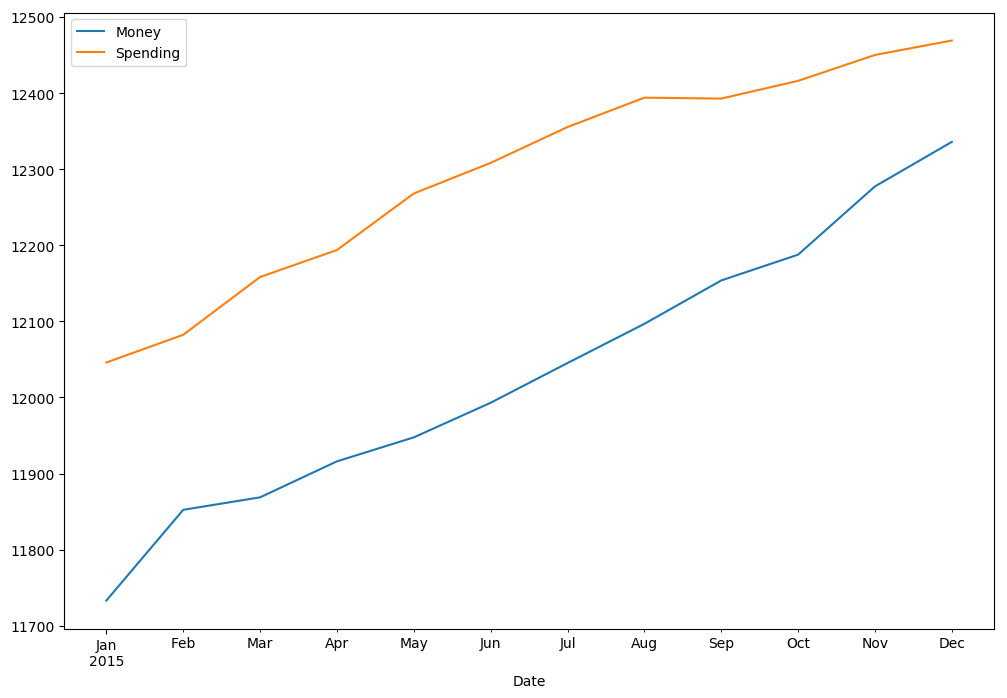

In [52]:
test_range.plot(figsize=(12,8))

In [53]:
df_forecast.columns

Index(['Money_2d', 'Spending_2d', 'Money1d', 'MoneyForecast', 'Spending1d',
       'SpendingForecast'],
      dtype='object')

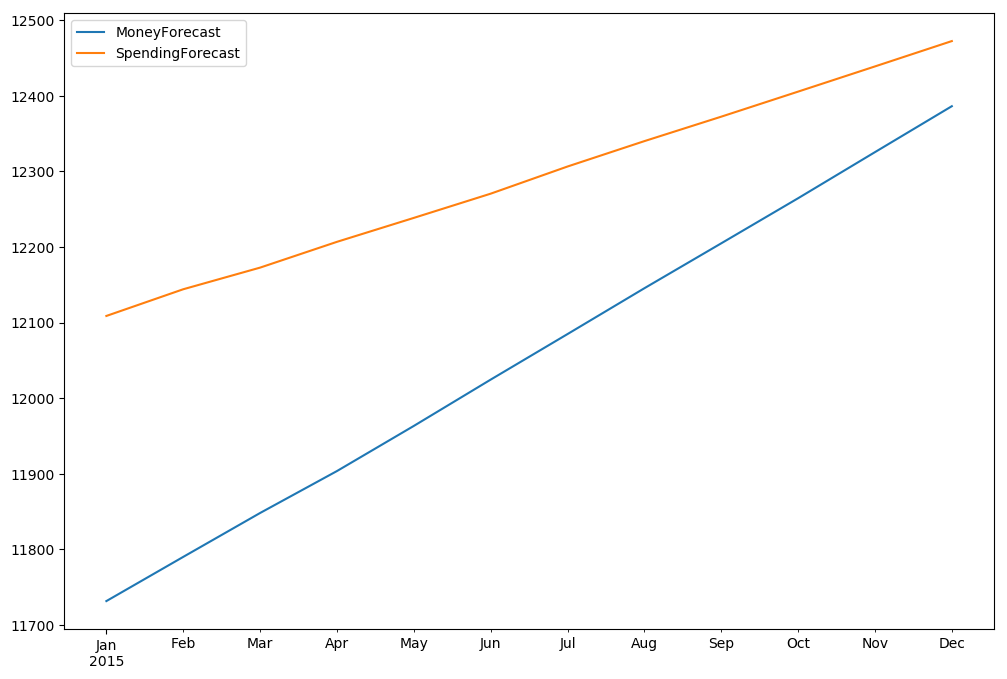

In [54]:
df_forecast[['MoneyForecast','SpendingForecast']].plot(figsize=(12,8))

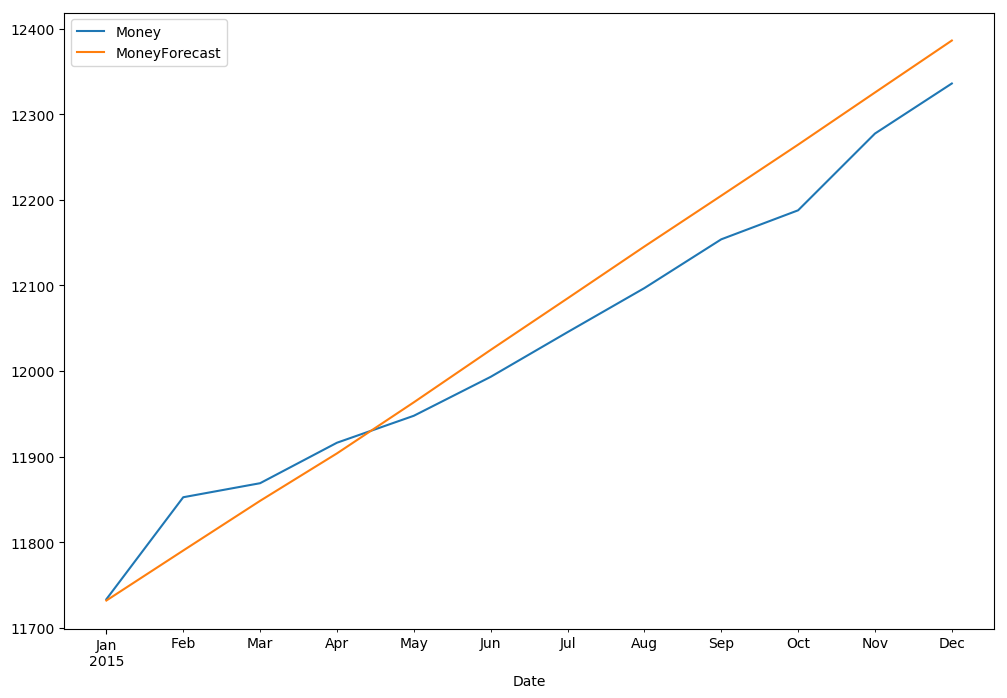

In [56]:
test_range['Money'].plot(legend=True,figsize=(12,8))
df_forecast['MoneyForecast'].plot(legend=True,figsize=(12,8))

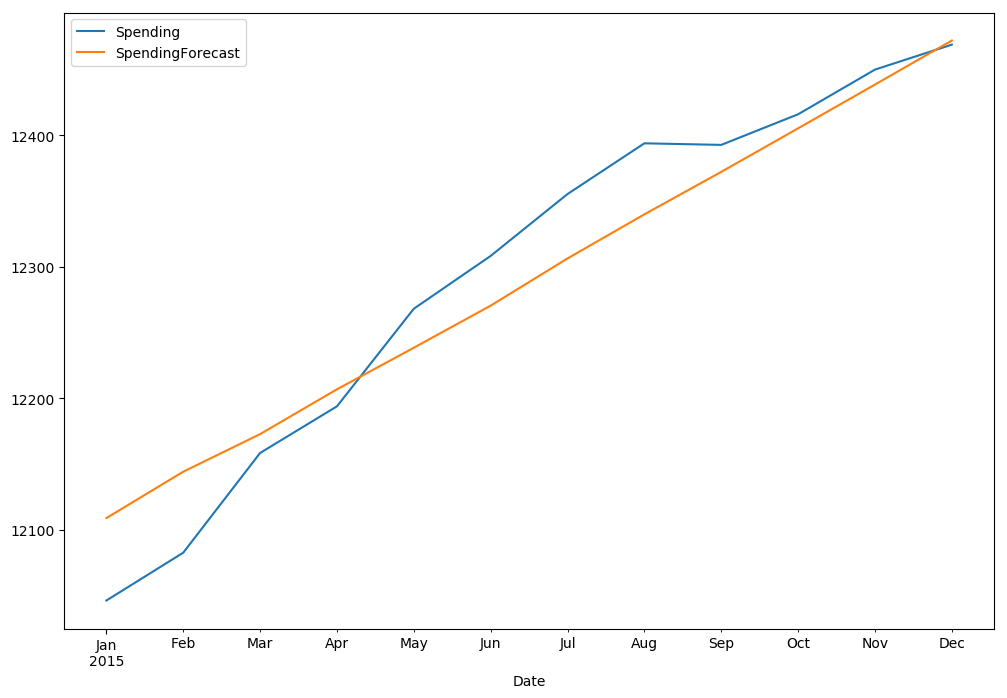

In [57]:
test_range['Spending'].plot(legend=True,figsize=(12,8))
df_forecast['SpendingForecast'].plot(legend=True,figsize=(12,8))

In [58]:
rmse(test_range['Money'],df_forecast['MoneyForecast'])

43.71049653558875

In [59]:
test_range['Money'].mean()

12034.008333333333

In [60]:
rmse(test_range['Spending'],df_forecast['SpendingForecast'])

37.001175169408086

In [62]:
test_range['Spending'].mean()

12294.533333333335

In [63]:
#VECTOR AUTOREGRESSION MOVING AVEGAGES - VARMA

In [66]:
import pandas as pd
import numpy as np
%matplotlib inline

#load specific forecasting tools
from statsmodels.tsa.statespace.varmax import VARMAX ,VARMAXResults 
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse


#ignore harmless warnings 
import warnings
warnings.filterwarnings("ignore")

#Load a no-stationary dataset
df=pd.read_csv("M2SLMoneyStock.csv",index_col=0,parse_dates=True)
df.index.freq = 'MS'

#load a stationary dataset
sp=pd.read_csv('PCEPersonalSpending.csv',index_col=0,parse_dates=True)
sp.index.freq = 'MS'

In [68]:
df.head()

Money
Date              
1995-01-01  3492.4
1995-02-01  3489.9
1995-03-01  3491.1
1995-04-01  3499.2
1995-05-01  3524.2

In [69]:
sp.head()

Spending
Date                
1995-01-01    4851.2
1995-02-01    4850.8
1995-03-01    4885.4
1995-04-01    4890.2
1995-05-01    4933.1

In [70]:
df=df.join(sp)

In [71]:
df

Money  Spending
Date                         
1995-01-01   3492.4    4851.2
1995-02-01   3489.9    4850.8
1995-03-01   3491.1    4885.4
1995-04-01   3499.2    4890.2
1995-05-01   3524.2    4933.1
1995-06-01   3548.9    4977.5
1995-07-01   3567.4    4970.2
1995-08-01   3589.0    5005.3
1995-09-01   3602.1    5020.5
1995-10-01   3613.4    5013.9
1995-11-01   3619.9    5055.6
1995-12-01   3629.5    5097.5
1996-01-01   3647.9    5085.7
1996-02-01   3661.9    5132.8
1996-03-01   3687.0    5173.3
1996-04-01   3697.8    5208.0
1996-05-01   3709.7    5223.8
1996-06-01   3722.7    5229.8
1996-07-01   3737.3    5251.9
1996-08-01   3744.3    5275.0
1996-09-01   3753.7    5296.6
1996-10-01   3771.0    5328.5
1996-11-01   3790.2    5351.2
1996-12-01   3810.5    5378.6
1997-01-01   3824.8    5411.1
1997-02-01   3836.4    5434.0
1997-03-01   3851.3    5454.2
1997-04-01   3867.4    5459.3
1997-05-01   3879.2    5460.2
1997-06-01   3896.0    5494.2
...             ...       ...
2013-07-01  10721.7   11296.7
2013-08-01  10780.1   11329.2
2013-09-01  10832.5   11366.9
2013-10-01  10945.4   11419.8
2013-11-01  10953.1   11487.6
2013-12-01  11015.7   11517.9
2014-01-01  11066.2   11512.5
2014-02-01  11148.7   11566.2
2014-03-01  11190.3   11643.0
2014-04-01  11246.7   11702.6
2014-05-01  11314.4   11748.4
2014-06-01  11366.6   11817.0
2014-07-01  11427.8   11860.5
2014-08-01  11457.1   11944.3
2014-09-01  11492.0   11957.4
2014-10-01  11552.4   12023.0
2014-11-01  11591.5   12051.4
2014-12-01  11670.1   12062.0
2015-01-01  11733.2   12046.0
2015-02-01  11852.4   12082.4
2015-03-01  11868.8   12158.3
2015-04-01  11916.1   12193.8
2015-05-01  11947.6   12268.1
2015-06-01  11993.1   12308.3
2015-07-01  12045.3   12355.4
2015-08-01  12096.8   12394.0
2015-09-01  12153.8   12392.8
2015-10-01  12187.7   12416.1
2015-11-01  12277.4   12450.1
2015-12-01  12335.9   12469.1

[252 rows x 2 columns]

In [72]:
df.shape

(252, 2)

In [73]:
df=df.dropna()

In [74]:
df.shape

(252, 2)

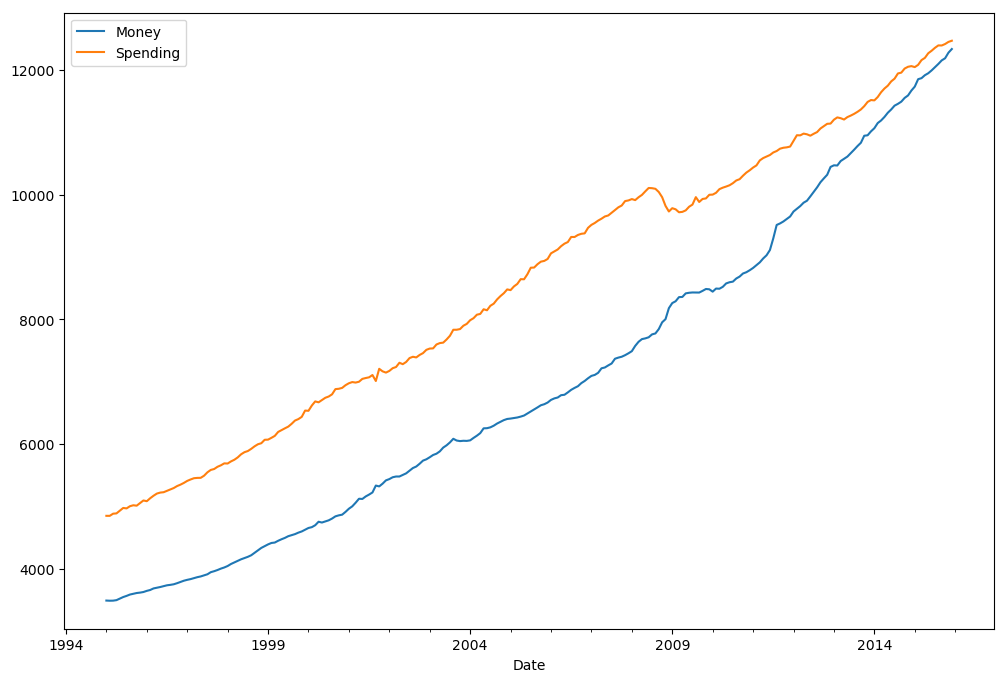

In [75]:
df.plot(figsize=(12,8))

In [76]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [78]:
auto_arima(df['Money'], maxiter=1000)

ARIMA(callback=None, disp=0, maxiter=1000, method=None, order=(1, 2, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)

In [79]:
auto_arima(df['Spending'], maxiter=1000)

ARIMA(callback=None, disp=0, maxiter=1000, method=None, order=(1, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)

In [81]:
df_transformed=df.diff().diff()
df_transformed=df_transformed.dropna()
df_transformed.head()

Money  Spending
Date                       
1995-03-01    3.7      35.0
1995-04-01    6.9     -29.8
1995-05-01   16.9      38.1
1995-06-01   -0.3       1.5
1995-07-01   -6.2     -51.7

In [84]:
len(df_transformed)

250

In [85]:
nobs=12
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [86]:
print(train.shape)
print(test.shape)

(238, 2)
(12, 2)


# FIT The VARMA (1,2) Model

In [82]:
model =VARMAX(train, order=(1,2), trend='c')
results=model.fit(maxiter=1000,disp=False)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                            
=================================================================================
Dep. Variable:     ['Money', 'Spending']   No. Observations:                  238
Model:                        VARMA(1,2)   Log Likelihood               -2286.481
                             + intercept   AIC                           4606.962
Date:                   Thu, 21 Dec 2023   BIC                           4665.990
Time:                           12:30:00   HQIC                          4630.751
Sample:                       03-01-1995                                         
                            - 12-01-2014                                         
Covariance Type:                     opg                                         
===================================================================================
Ljung-Box (Q):                68.21, 28.37   Jarque-Bera (JB):       560.56, 123.02
Prob(Q):                        0.00, 0.92   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         5.65, 2.86   Skew:                      1.35, -0.33
Prob(H) (two-sided):            0.00, 0.00   Kurtosis:                  10.02, 6.46
                            Results for equation Money                            
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0573      0.762     -0.075      0.940      -1.550       1.435
L1.Money          -0.9341      2.740     -0.341      0.733      -6.304       4.436
L1.Spending        1.7035      4.677      0.364      0.716      -7.464      10.871
L1.e(Money)        0.1687      2.729      0.062      0.951      -5.180       5.517
L1.e(Spending)    -1.8245      4.679     -0.390      0.697     -10.995       7.346
L2.e(Money)       -1.1892      2.768     -0.430      0.667      -6.614       4.236
L2.e(Spending)     1.5946      4.104      0.389      0.698      -6.449       9.638
                          Results for equation Spending                           
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1458      0.404      0.361      0.718      -0.646       0.937
L1.Money          -0.2053      1.754     -0.117      0.907      -3.643       3.233
L1.Spending        0.4834      2.832      0.171      0.864      -5.066       6.033
L1.e(Money)        0.3316      1.808      0.183      0.854      -3.212       3.875
L1.e(Spending)    -1.4389      2.811     -0.512      0.609      -6.949       4.071
L2.e(Money)       -0.3278      1.841     -0.178      0.859      -3.935       3.280
L2.e(Spending)     0.4990      2.446      0.204      0.838      -4.296       5.294
                                  Error covariance matrix                                  
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
sqrt.var.Money             25.5142      1.192     21.409      0.000      23.178      27.850
sqrt.cov.Money.Spending    -9.4879      1.861     -5.099      0.000     -13.135      -5.841
sqrt.var.Spending          33.5933      1.237     27.158      0.000      31.169      36.018
===========================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predict The next 12 values

In [83]:
df_forecast =results.forecast(12)
df_forecast

Money   Spending
2015-01-01 -12.456003  38.786257
2015-02-01 -11.489902  -5.275590
2015-03-01   1.688947  -0.045980
2015-04-01  -1.713355  -0.223104
2015-05-01   1.163135   0.389610
2015-06-01  -0.480154   0.095374
2015-07-01   0.553678   0.290437
2015-08-01  -0.079777   0.172529
2015-09-01   0.311103   0.245553
2015-10-01   0.070363   0.200623
2015-11-01   0.218708   0.228317
2015-12-01   0.127310   0.211255

In [87]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money'].cumsum()

In [88]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending'].cumsum()

In [89]:
df_forecast

Money   Spending    Money1d  MoneyForecast  Spending1d  \
2015-01-01 -12.456003  38.786257  66.143997   11657.643997   49.386257   
2015-02-01 -11.489902  -5.275590  54.654095   11646.154095   44.110667   
2015-03-01   1.688947  -0.045980  56.343042   11647.843042   44.064687   
2015-04-01  -1.713355  -0.223104  54.629687   11646.129687   43.841583   
2015-05-01   1.163135   0.389610  55.792822   11647.292822   44.231193   
2015-06-01  -0.480154   0.095374  55.312668   11646.812668   44.326567   
2015-07-01   0.553678   0.290437  55.866346   11647.366346   44.617005   
2015-08-01  -0.079777   0.172529  55.786570   11647.286570   44.789534   
2015-09-01   0.311103   0.245553  56.097672   11647.597672   45.035087   
2015-10-01   0.070363   0.200623  56.168036   11647.668036   45.235710   
2015-11-01   0.218708   0.228317  56.386744   11647.886744   45.464027   
2015-12-01   0.127310   0.211255  56.514054   11648.014054   45.675282   

            SpendingForecast  
2015-01-01      12100.786257  
2015-02-01      12095.510667  
2015-03-01      12095.464687  
2015-04-01      12095.241583  
2015-05-01      12095.631193  
2015-06-01      12095.726567  
2015-07-01      12096.017005  
2015-08-01      12096.189534  
2015-09-01      12096.435087  
2015-10-01      12096.635710  
2015-11-01      12096.864027  
2015-12-01      12097.075282

In [90]:
pd.concat([df.iloc[-12:],df_forecast[['MoneyForecast','SpendingForecast']]],axis=1)

Money  Spending  MoneyForecast  SpendingForecast
Date                                                          
2015-01-01  11733.2   12046.0   11657.643997      12100.786257
2015-02-01  11852.4   12082.4   11646.154095      12095.510667
2015-03-01  11868.8   12158.3   11647.843042      12095.464687
2015-04-01  11916.1   12193.8   11646.129687      12095.241583
2015-05-01  11947.6   12268.1   11647.292822      12095.631193
2015-06-01  11993.1   12308.3   11646.812668      12095.726567
2015-07-01  12045.3   12355.4   11647.366346      12096.017005
2015-08-01  12096.8   12394.0   11647.286570      12096.189534
2015-09-01  12153.8   12392.8   11647.597672      12096.435087
2015-10-01  12187.7   12416.1   11647.668036      12096.635710
2015-11-01  12277.4   12450.1   11647.886744      12096.864027
2015-12-01  12335.9   12469.1   11648.014054      12097.075282

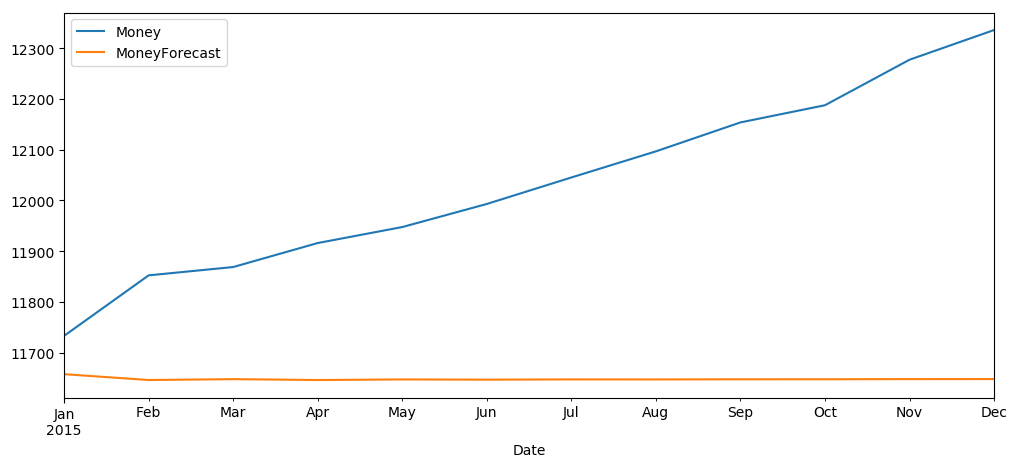

In [91]:
df['Money'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True);

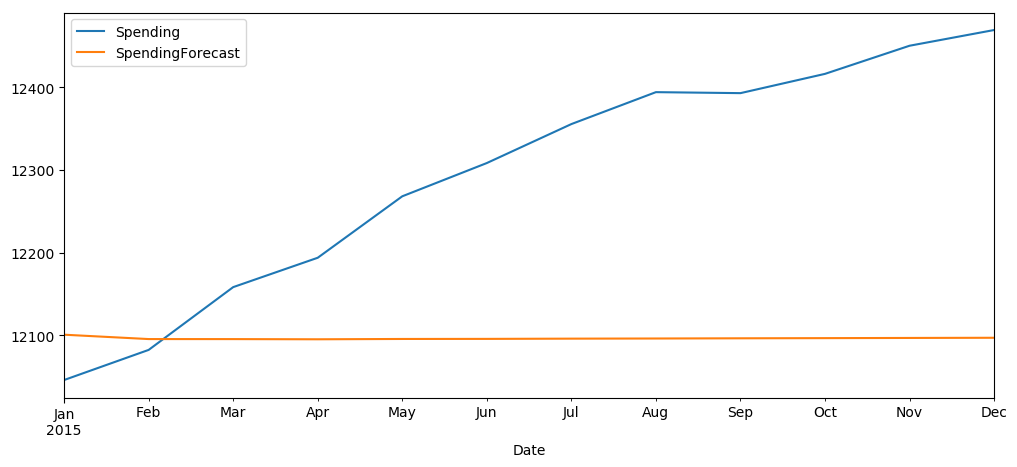

In [92]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

# Evaluate the model

&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>
where $T$ is the last observation period and $l$ is the lag.

In [93]:
RMSE1 = rmse(df['Money'][-nobs:], df_forecast['MoneyForecast'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 424.049


In [94]:
RMSE2 = rmse(df['Spending'][-nobs:], df_forecast['SpendingForecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 241.662


# Clearly these results are less accurate than our earlier VAR(5) model. Still, this tells us something!
## Let's compare these results to individual ARMA(1,2) models

In [95]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults

# Money

In [96]:
model = ARMA(train['Money'],order=(1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Money   No. Observations:                  238
Model:                     ARMA(1, 2)   Log Likelihood               -1117.710
Method:                       css-mle   S.D. of innovations             26.215
Date:                Thu, 21 Dec 2023   AIC                           2245.421
Time:                        13:50:01   BIC                           2262.782
Sample:                    03-01-1995   HQIC                          2252.418
                         - 12-01-2014                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1814      0.029      6.302      0.000       0.125       0.238
ar.L1.Money    -0.3568      0.293     -1.217      0.225      -0.931       0.218
ma.L1.Money    -0.4087      0.260     -1.572      0.117      -0.918       0.101
ma.L2.Money    -0.5912      0.260     -2.278      0.024      -1.100      -0.083
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.8023           +0.0000j            2.8023            0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
MA.2           -1.6913           +0.0000j            1.6913            0.5000
-----------------------------------------------------------------------------
"""

In [97]:
start=len(train)
end=len(train)+len(test)-1
z1 = results.predict(start=start, end=end).rename('Money')
z1 = pd.DataFrame(z1)

In [98]:
z1

Money
2015-01-01 -14.498341
2015-02-01 -10.946662
2015-03-01   4.152431
2015-04-01  -1.235662
2015-05-01   0.687073
2015-06-01   0.000947
2015-07-01   0.245790
2015-08-01   0.158418
2015-09-01   0.189597
2015-10-01   0.178471
2015-11-01   0.182441
2015-12-01   0.181024

# Invert the Transformation, Evaluate the Forecast


In [99]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z1['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + z1['Money'].cumsum()

# Now build the forecast values from the first difference set
z1['MoneyForecast'] = df['Money'].iloc[-nobs-1] + z1['Money1d'].cumsum()

In [100]:
z1

Money    Money1d  MoneyForecast
2015-01-01 -14.498341  64.101659   11734.201659
2015-02-01 -10.946662  53.154997   11787.356657
2015-03-01   4.152431  57.307428   11844.664085
2015-04-01  -1.235662  56.071767   11900.735852
2015-05-01   0.687073  56.758839   11957.494691
2015-06-01   0.000947  56.759787   12014.254478
2015-07-01   0.245790  57.005577   12071.260055
2015-08-01   0.158418  57.163995   12128.424051
2015-09-01   0.189597  57.353592   12185.777643
2015-10-01   0.178471  57.532063   12243.309706
2015-11-01   0.182441  57.714505   12301.024211
2015-12-01   0.181024  57.895529   12358.919740

In [101]:
RMSE3 = rmse(df['Money'][-nobs:], z1['MoneyForecast'])

print(f'Money VARMA(1,2) RMSE: {RMSE1:.3f}')
print(f'Money  ARMA(1,2) RMSE: {RMSE3:.3f}')

Money VARMA(1,2) RMSE: 424.049
Money  ARMA(1,2) RMSE: 32.240


# Personal Spending


In [102]:
model = ARMA(train['Spending'],order=(1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Spending   No. Observations:                  238
Model:                     ARMA(1, 2)   Log Likelihood               -1182.411
Method:                       css-mle   S.D. of innovations             34.661
Date:                Thu, 21 Dec 2023   AIC                           2374.823
Time:                        13:51:30   BIC                           2392.184
Sample:                    03-01-1995   HQIC                          2381.820
                         - 12-01-2014                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0856      0.245      0.350      0.727      -0.394       0.565
ar.L1.Spending    -0.3403      0.511     -0.666      0.506      -1.342       0.661
ma.L1.Spending    -0.6451      0.521     -1.237      0.217      -1.667       0.377
ma.L2.Spending    -0.2139      0.485     -0.441      0.660      -1.165       0.737
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.9388           +0.0000j            2.9388            0.5000
MA.1            1.1281           +0.0000j            1.1281            0.0000
MA.2           -4.1439           +0.0000j            4.1439            0.5000
-----------------------------------------------------------------------------
"""

In [103]:
start=len(train)
end=len(train)+len(test)-1
z2 = results.predict(start=start, end=end).rename('Spending')
z2 = pd.DataFrame(z2)
z2

Spending
2015-01-01  33.555878
2015-02-01  -3.338280
2015-03-01   1.250691
2015-04-01  -0.310820
2015-05-01   0.220523
2015-06-01   0.039720
2015-07-01   0.101243
2015-08-01   0.080308
2015-09-01   0.087432
2015-10-01   0.085008
2015-11-01   0.085833
2015-12-01   0.085552

# Invert the Transformation, Evaluate the Forecast


In [104]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z2['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + z2['Spending'].cumsum()

# Now build the forecast values from the first difference set
z2['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + z2['Spending1d'].cumsum()

In [105]:
z2


Spending  Spending1d  SpendingForecast
2015-01-01  33.555878   44.155878      12106.155878
2015-02-01  -3.338280   40.817598      12146.973476
2015-03-01   1.250691   42.068290      12189.041766
2015-04-01  -0.310820   41.757470      12230.799236
2015-05-01   0.220523   41.977993      12272.777228
2015-06-01   0.039720   42.017713      12314.794942
2015-07-01   0.101243   42.118956      12356.913898
2015-08-01   0.080308   42.199265      12399.113162
2015-09-01   0.087432   42.286697      12441.399859
2015-10-01   0.085008   42.371705      12483.771563
2015-11-01   0.085833   42.457537      12526.229101
2015-12-01   0.085552   42.543089      12568.772190

In [106]:
RMSE4 = rmse(df['Spending'][-nobs:], z2['SpendingForecast'])

print(f'Spending VARMA(1,2) RMSE: {RMSE2:.3f}')
print(f'Spending  ARMA(1,2) RMSE: {RMSE4:.3f}')

Spending VARMA(1,2) RMSE: 241.662
Spending  ARMA(1,2) RMSE: 52.334


# <strong>CONCLUSION:</strong> It looks like the VARMA(1,2) model 
    did a relatively poor job compared to simpler alternatives. 
    This tells us that there is little or no interdepence between 
    Money Stock and Personal Consumption Expenditures, 
    at least for the timespan we investigated. This is helpful! 
    By fitting a model and getting poor results we know more about 
    the data than we did before.